In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()
%matplotlib notebook


In [29]:
# tesla = pd.read_csv('TSLA.csv')
tesla = pd.read_csv('../Dataset/11_28.csv', parse_dates=['Date'])

tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.head()

Date   Open   High    Low  Close  Adj Close      Volume  OilPrice  \
0 2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500.0     74.94   
1 2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000.0     71.73   
2 2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000.0     71.75   
3 2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500.0     73.08   
4 2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500.0     72.97   

   deaths  DPRIME   TOTALSA  
0     0.0    3.25  0.386600  
1     0.0    3.25  0.398267  
2     0.0    3.25  0.398267  
3     0.0    3.25  0.398267  
4     0.0    3.25  0.398267

In [30]:
def df_shift(df,lag=0, start=1, skip=1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(start,lag+1,skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = (skip - 1)
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=skip
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [31]:
tesla = tesla[['Date','Close']]
tesla.head(1)

Date  Close
0 2010-06-30  4.766

In [32]:
df_crosscorrelated = df_shift(tesla, lag = 15, start = 1, skip = 2,rejected_columns=['Date'])

# df_crosscorrelated.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


<IPython.core.display.Javascript object>


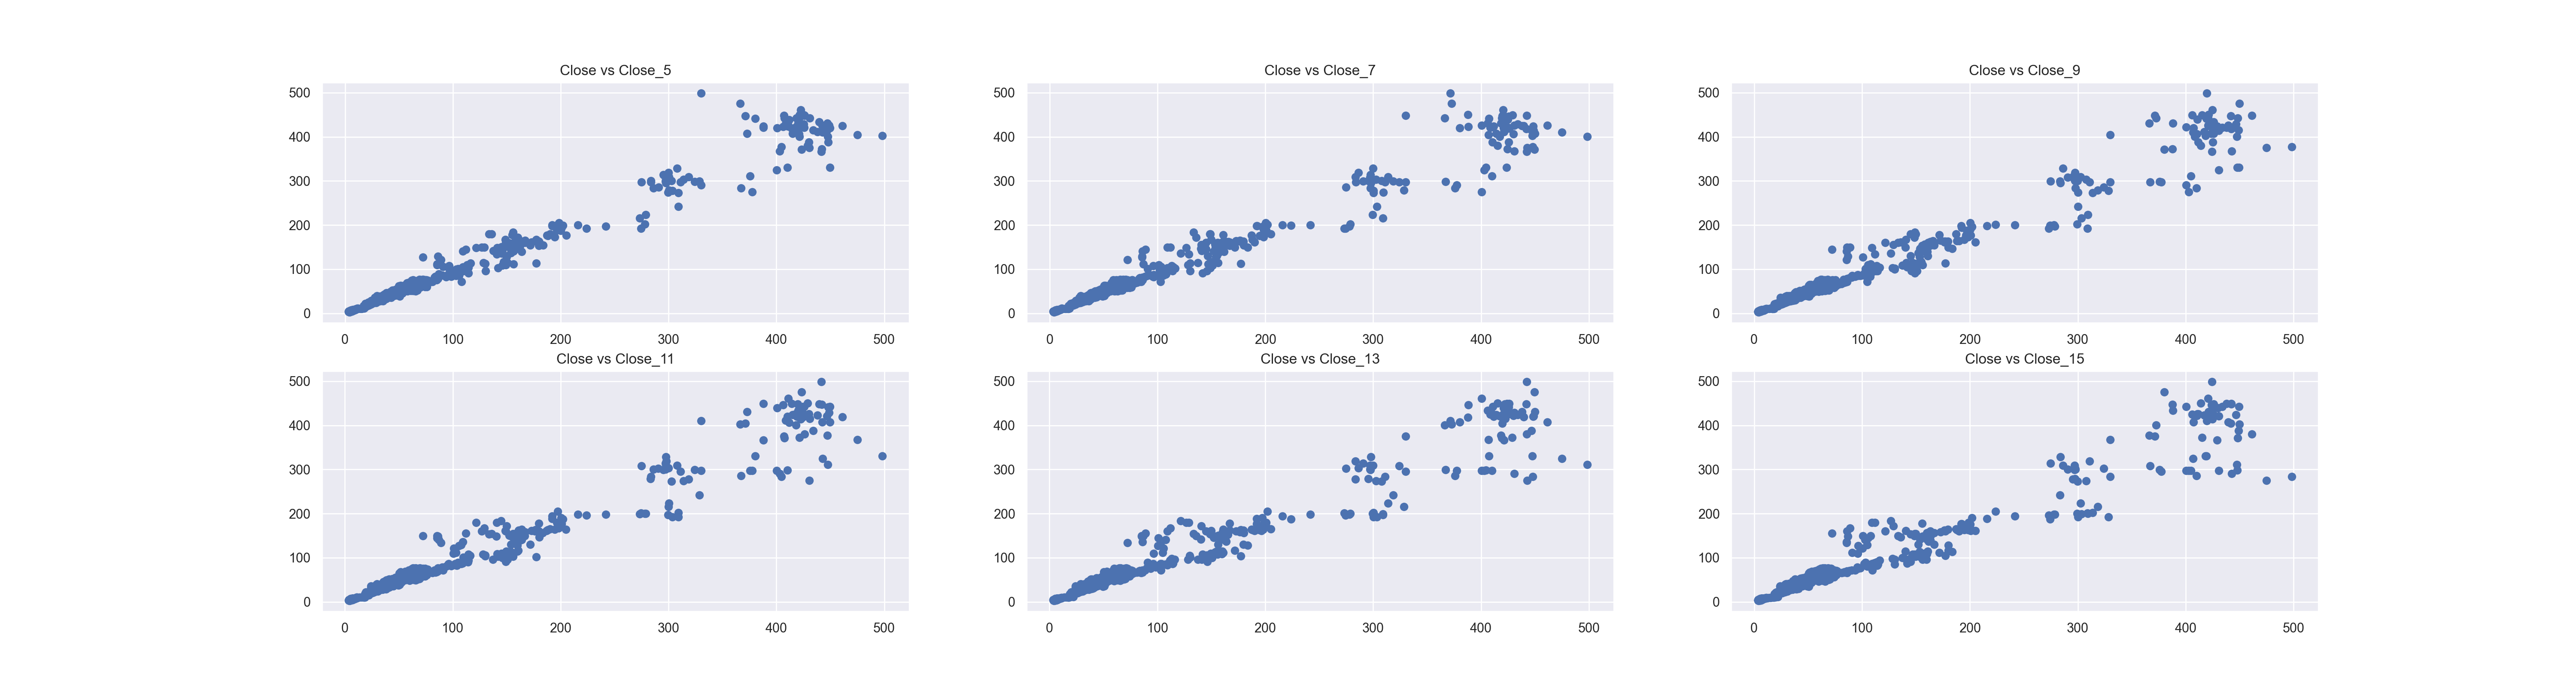

In [33]:
plt.figure(figsize=(30, 8))
# plt.subplot(1,3,1)
# plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_1'])
# plt.title('Close vs Close_1')
plt.subplot(2,3,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'])
plt.title('Close vs Close_5')
plt.subplot(2,3,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'])
plt.title('Close vs Close_7')
plt.subplot(2,3,3)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'])
plt.title('Close vs Close_9')
plt.subplot(2,3,4)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_11'])
plt.title('Close vs Close_11')
plt.subplot(2,3,5)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_13'])
plt.title('Close vs Close_13')
plt.subplot(2,3,6)

plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_15'])
plt.title('Close vs Close_15')
plt.show()
plt.savefig(fname="x.png")

<IPython.core.display.Javascript object>


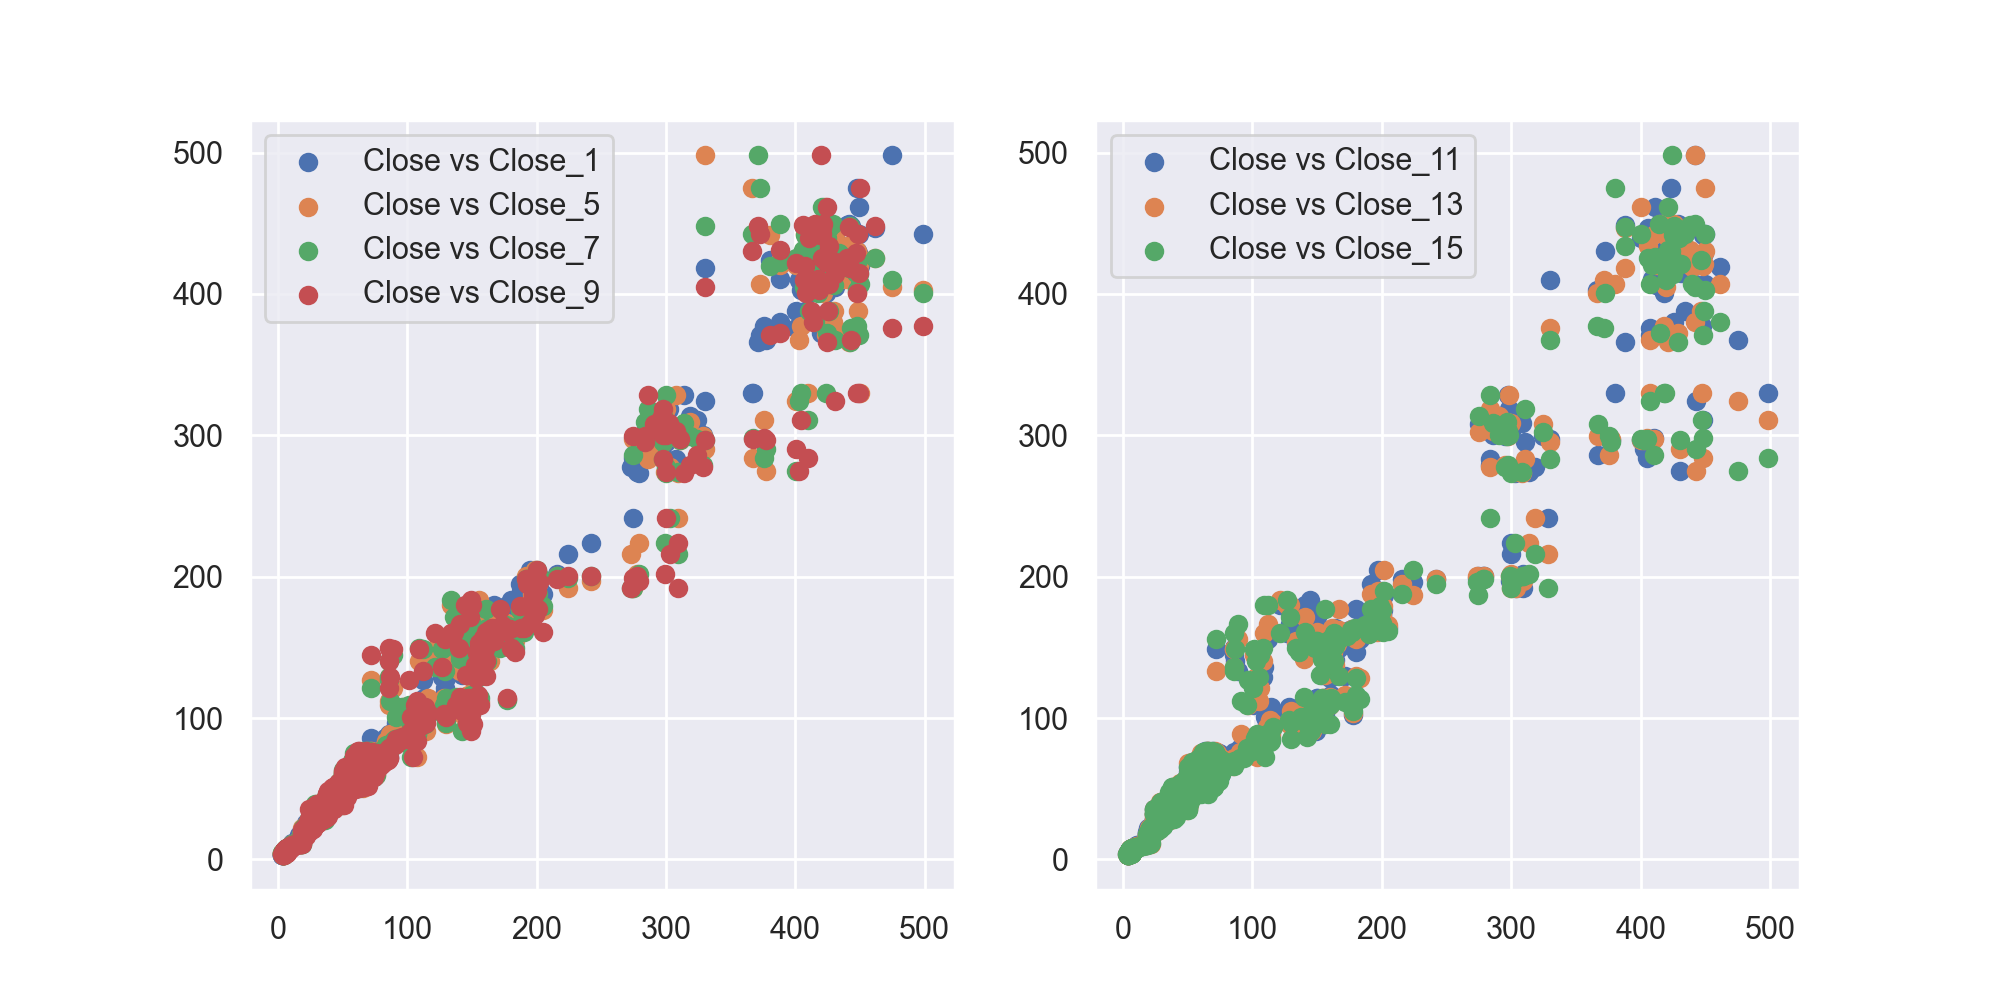

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_1'],label='Close vs Close_1')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'],label='Close vs Close_5')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'],label='Close vs Close_7')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'],label='Close vs Close_9')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_11'],label='Close vs Close_11')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_13'],label='Close vs Close_13')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_15'],label='Close vs Close_15')
plt.legend()
plt.show()
plt.savefig(fname="x1.png")

<IPython.core.display.Javascript object>


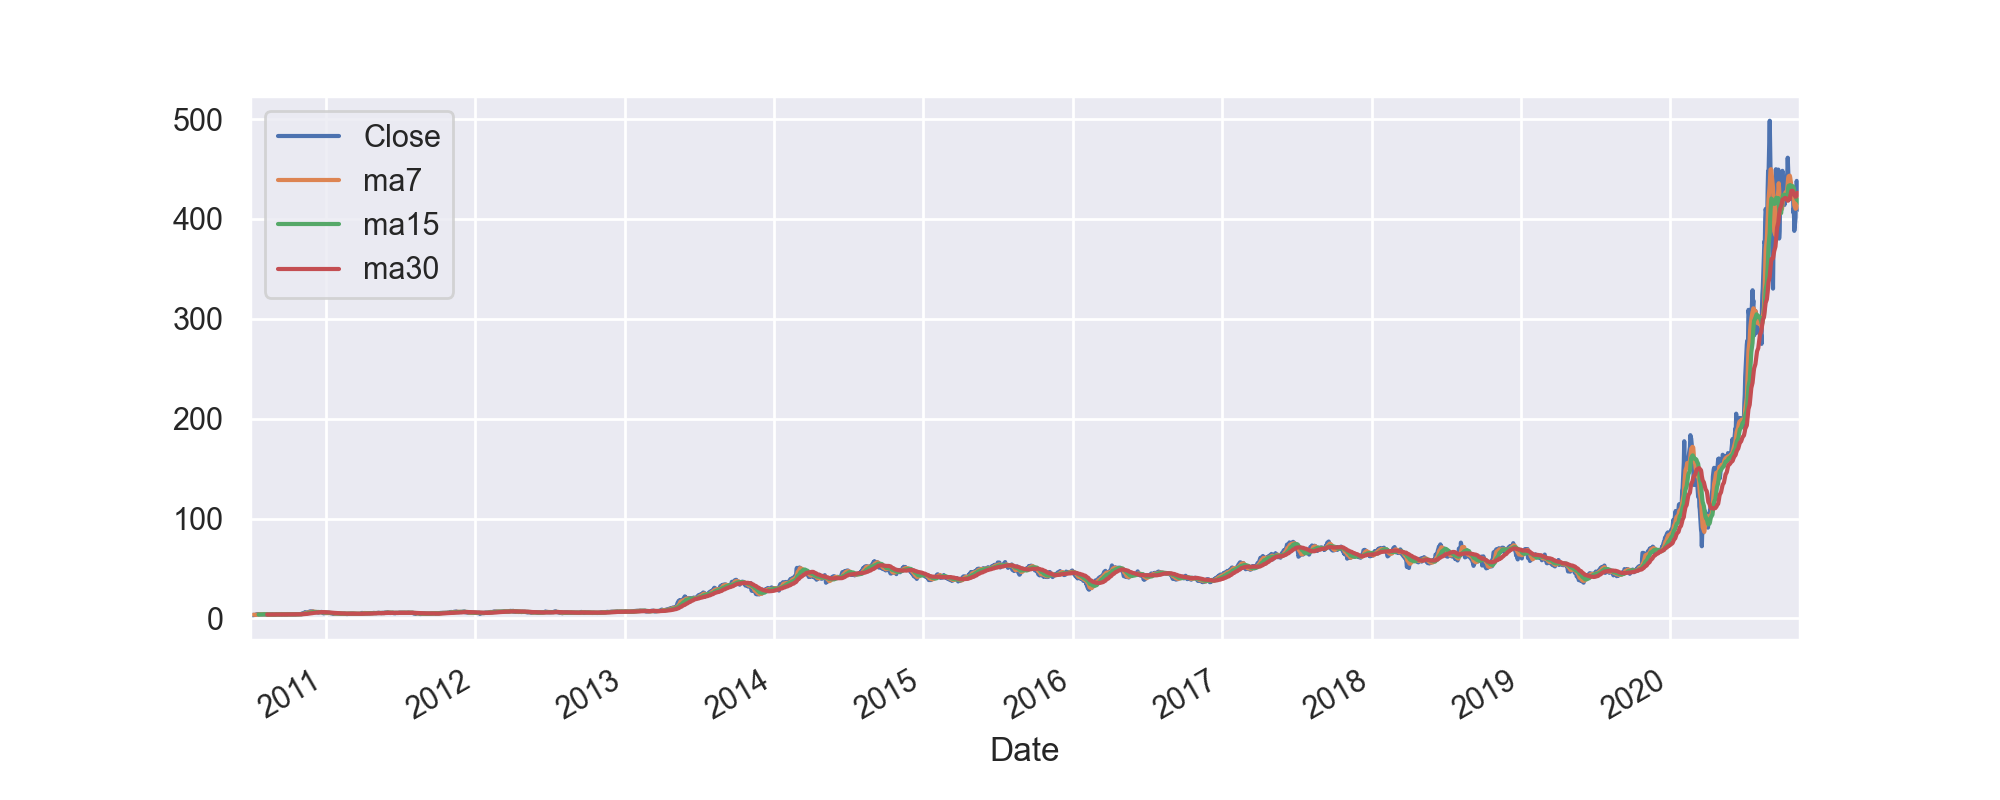

In [35]:
df_crosscorrelated['ma7'] = df_crosscorrelated['Close'].rolling(7).mean()
df_crosscorrelated['ma15'] = df_crosscorrelated['Close'].rolling(15).mean()
df_crosscorrelated['ma30'] = df_crosscorrelated['Close'].rolling(30).mean()
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='Date',y=['Close','ma7','ma15','ma30'],ax=ax)
plt.show()
plt.savefig(fname="x2.png")

<IPython.core.display.Javascript object>


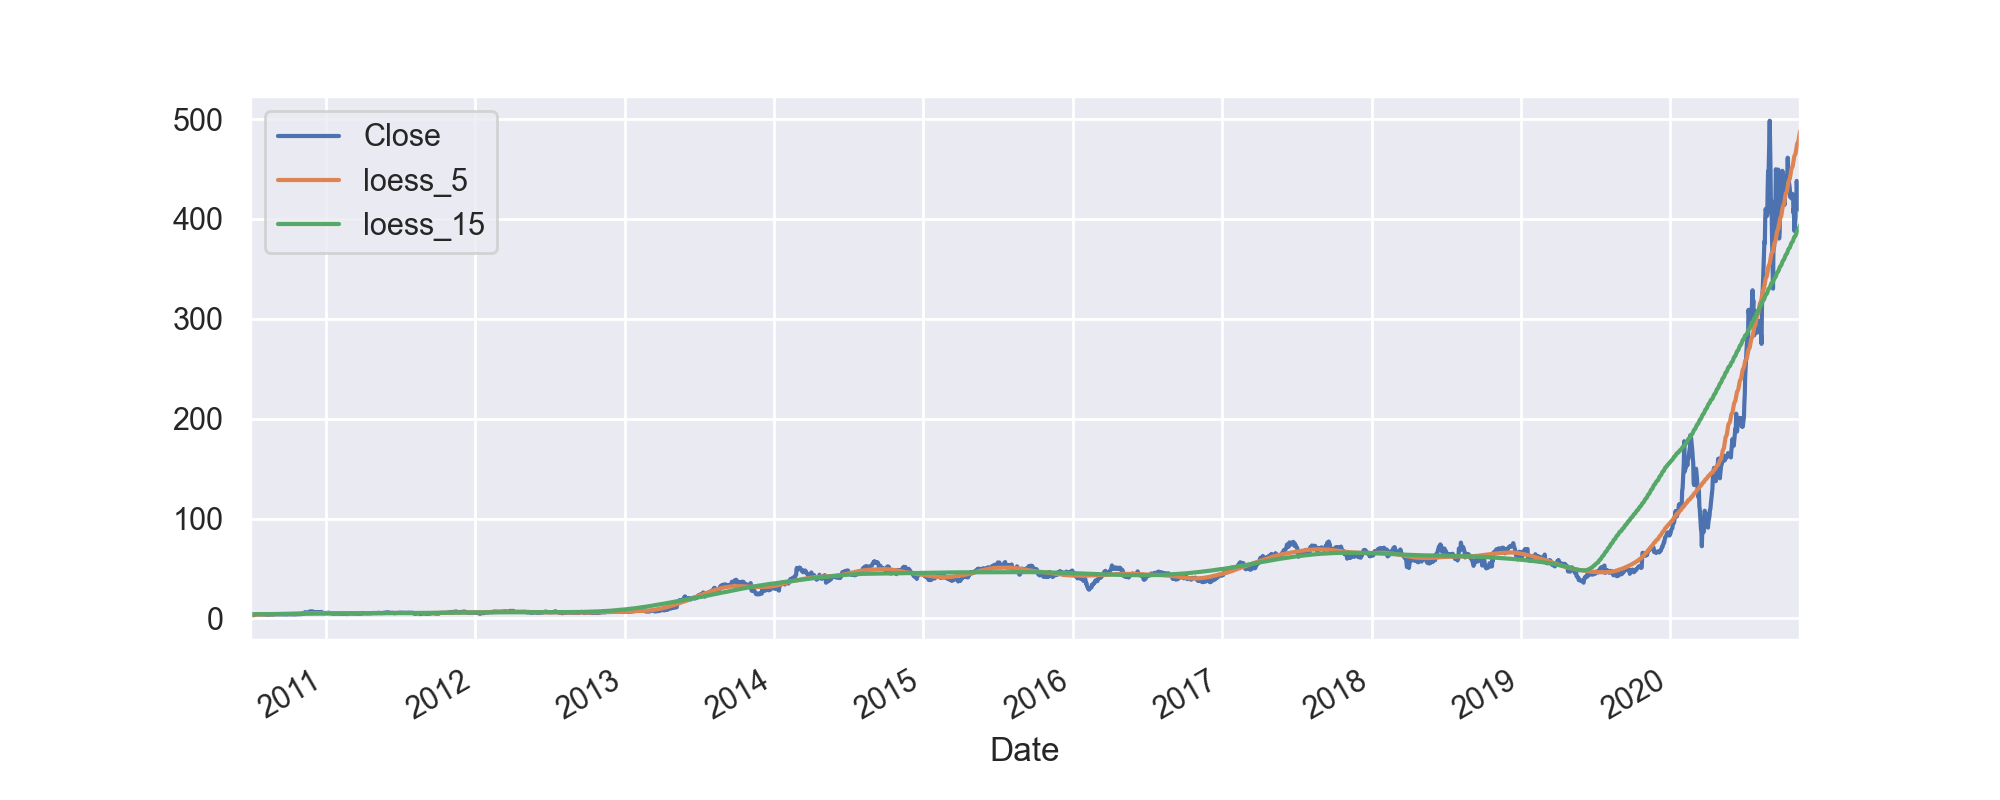

In [37]:
#  Loess Smoothing (5% and 15%)
from statsmodels.nonparametric.smoothers_lowess import lowess
df_crosscorrelated['loess_5'] = lowess(df_crosscorrelated['Close'], np.arange(len(df_crosscorrelated['Close'])), frac=0.05)[:, 1]
df_crosscorrelated['loess_15'] = lowess(df_crosscorrelated['Close'], np.arange(len(df_crosscorrelated['Close'])), frac=0.15)[:, 1]

fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='Date',y=['Close','loess_5','loess_15'],ax=ax)
plt.show()
plt.savefig(fname="x3.png")

<IPython.core.display.Javascript object>


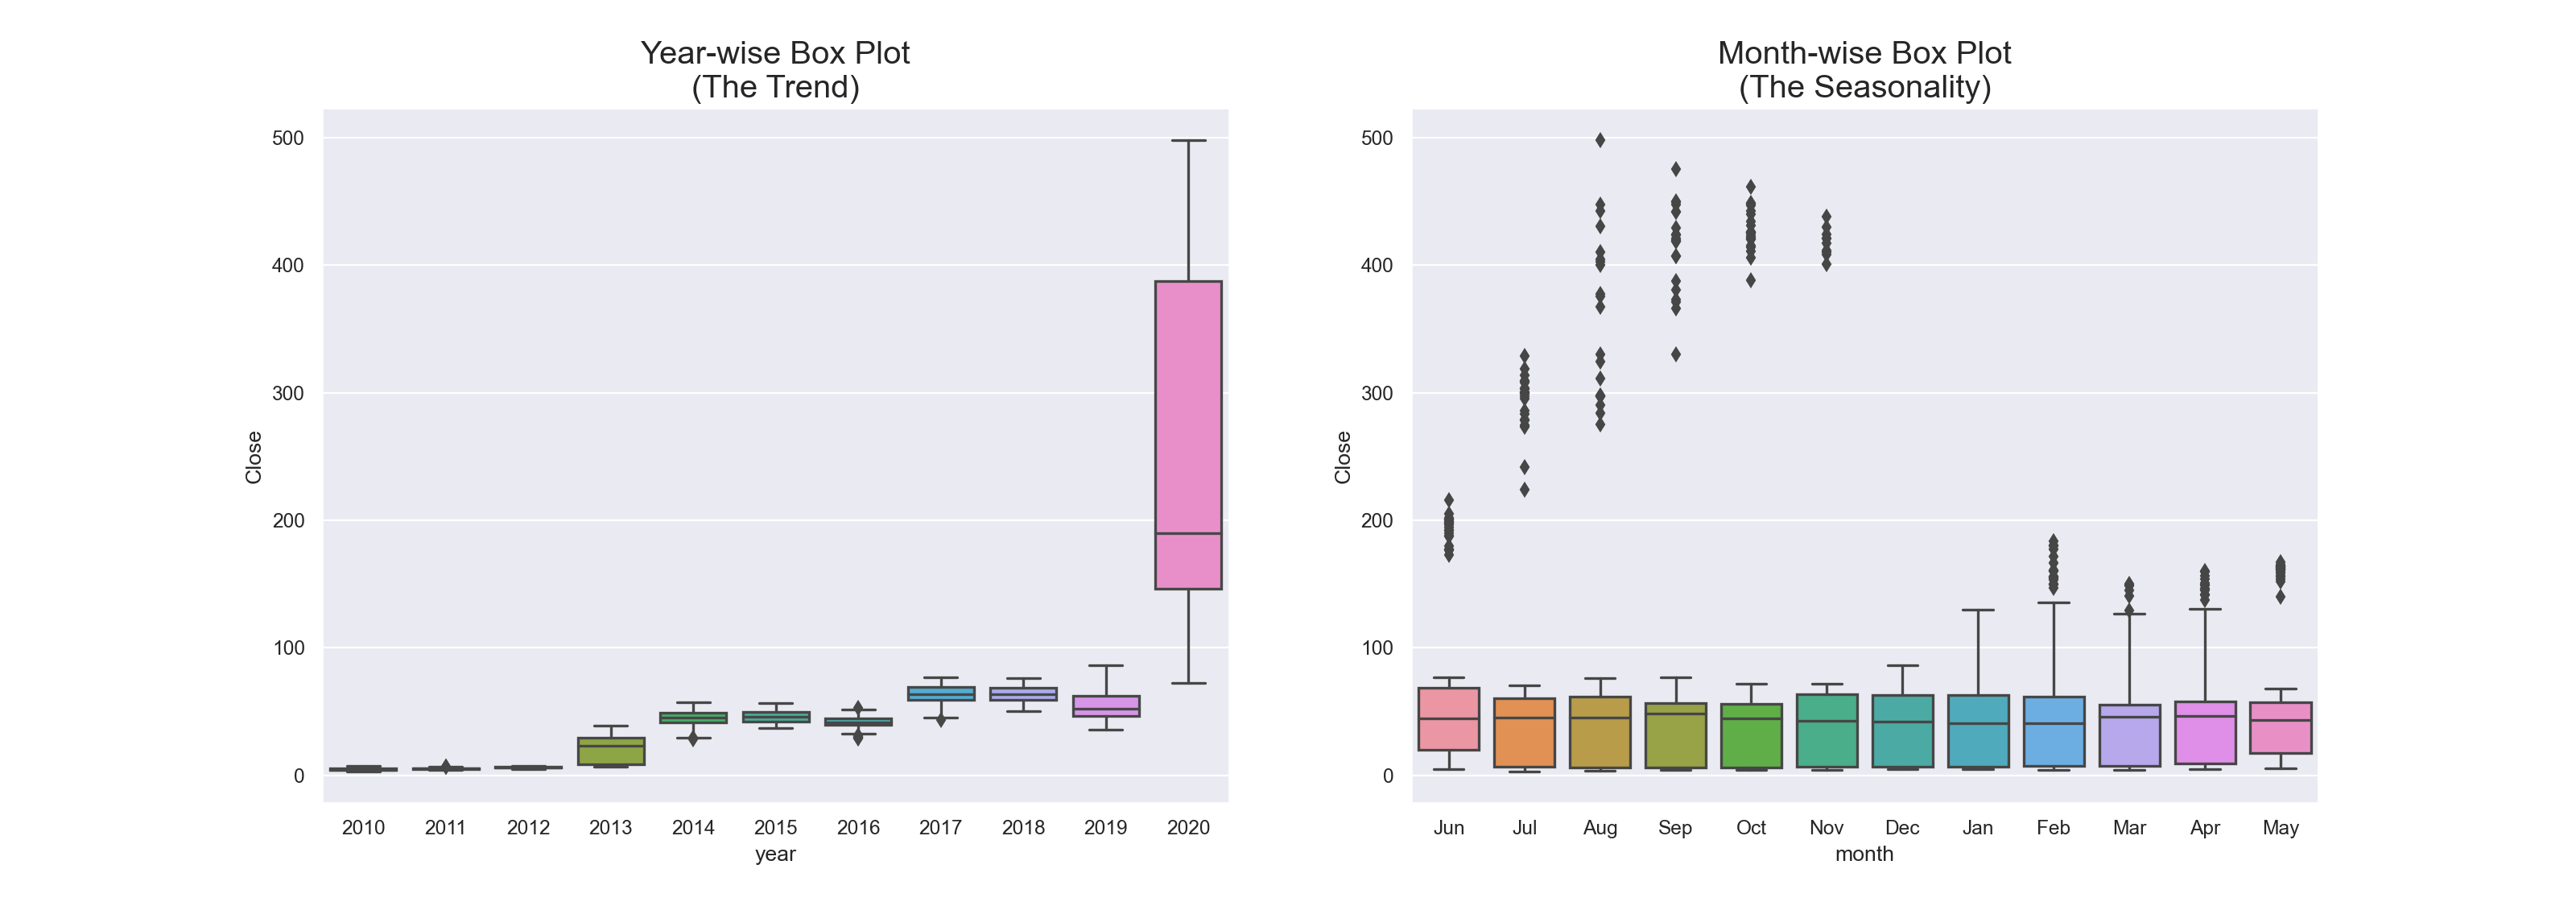

In [19]:
df = df_crosscorrelated
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='month', y='Close', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()
plt.savefig(fname="x4.png")

<IPython.core.display.Javascript object>


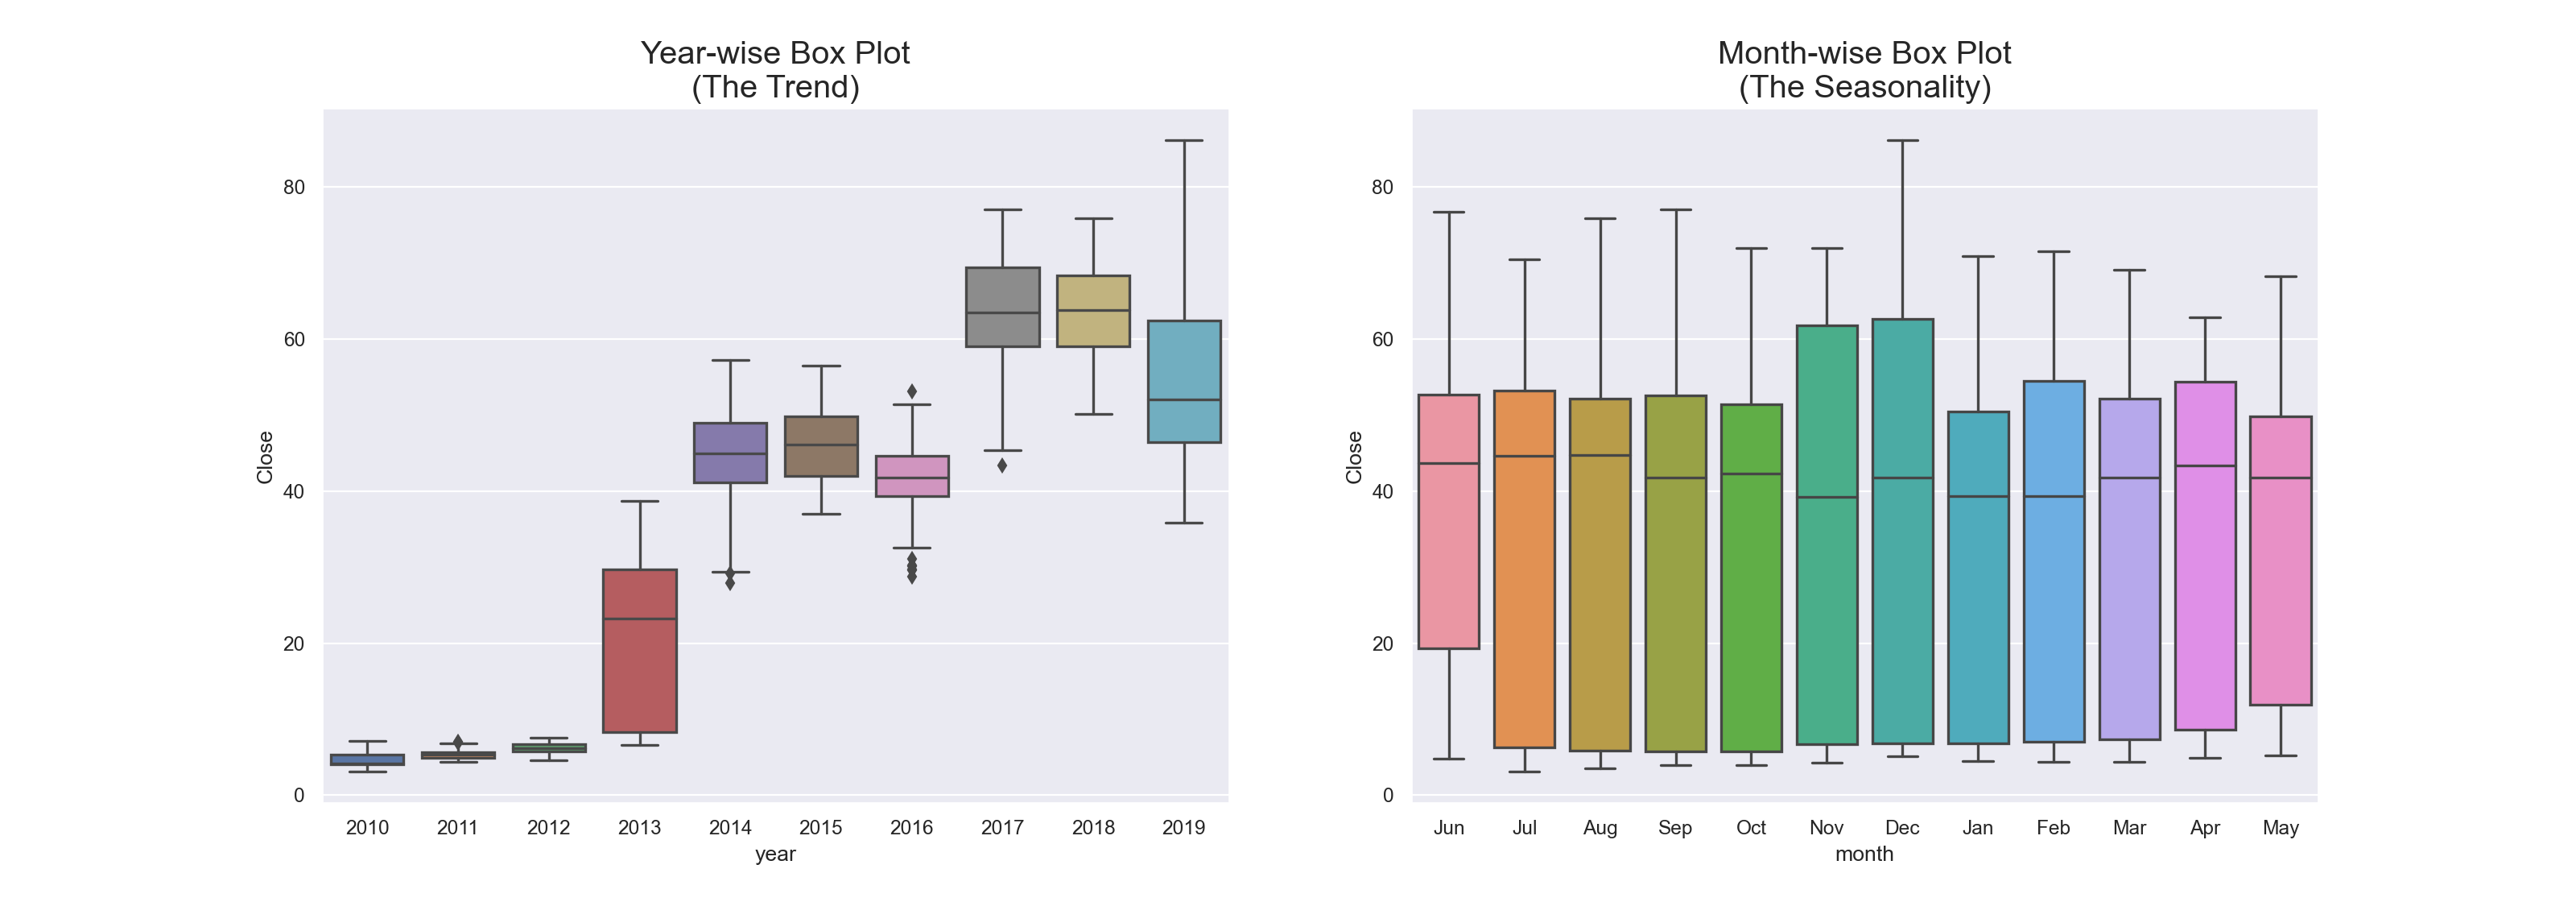

In [23]:
no_2020 = pd.read_csv('../Dataset/without_2020.csv', parse_dates=['Date'])

no_2020['year'] = [d.year for d in no_2020.Date]
no_2020['month'] = [d.strftime('%b') for d in no_2020.Date]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=no_2020, ax=axes[0])
sns.boxplot(x='month', y='Close', data=no_2020)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()
plt.savefig(fname="x5.png")

<IPython.core.display.Javascript object>


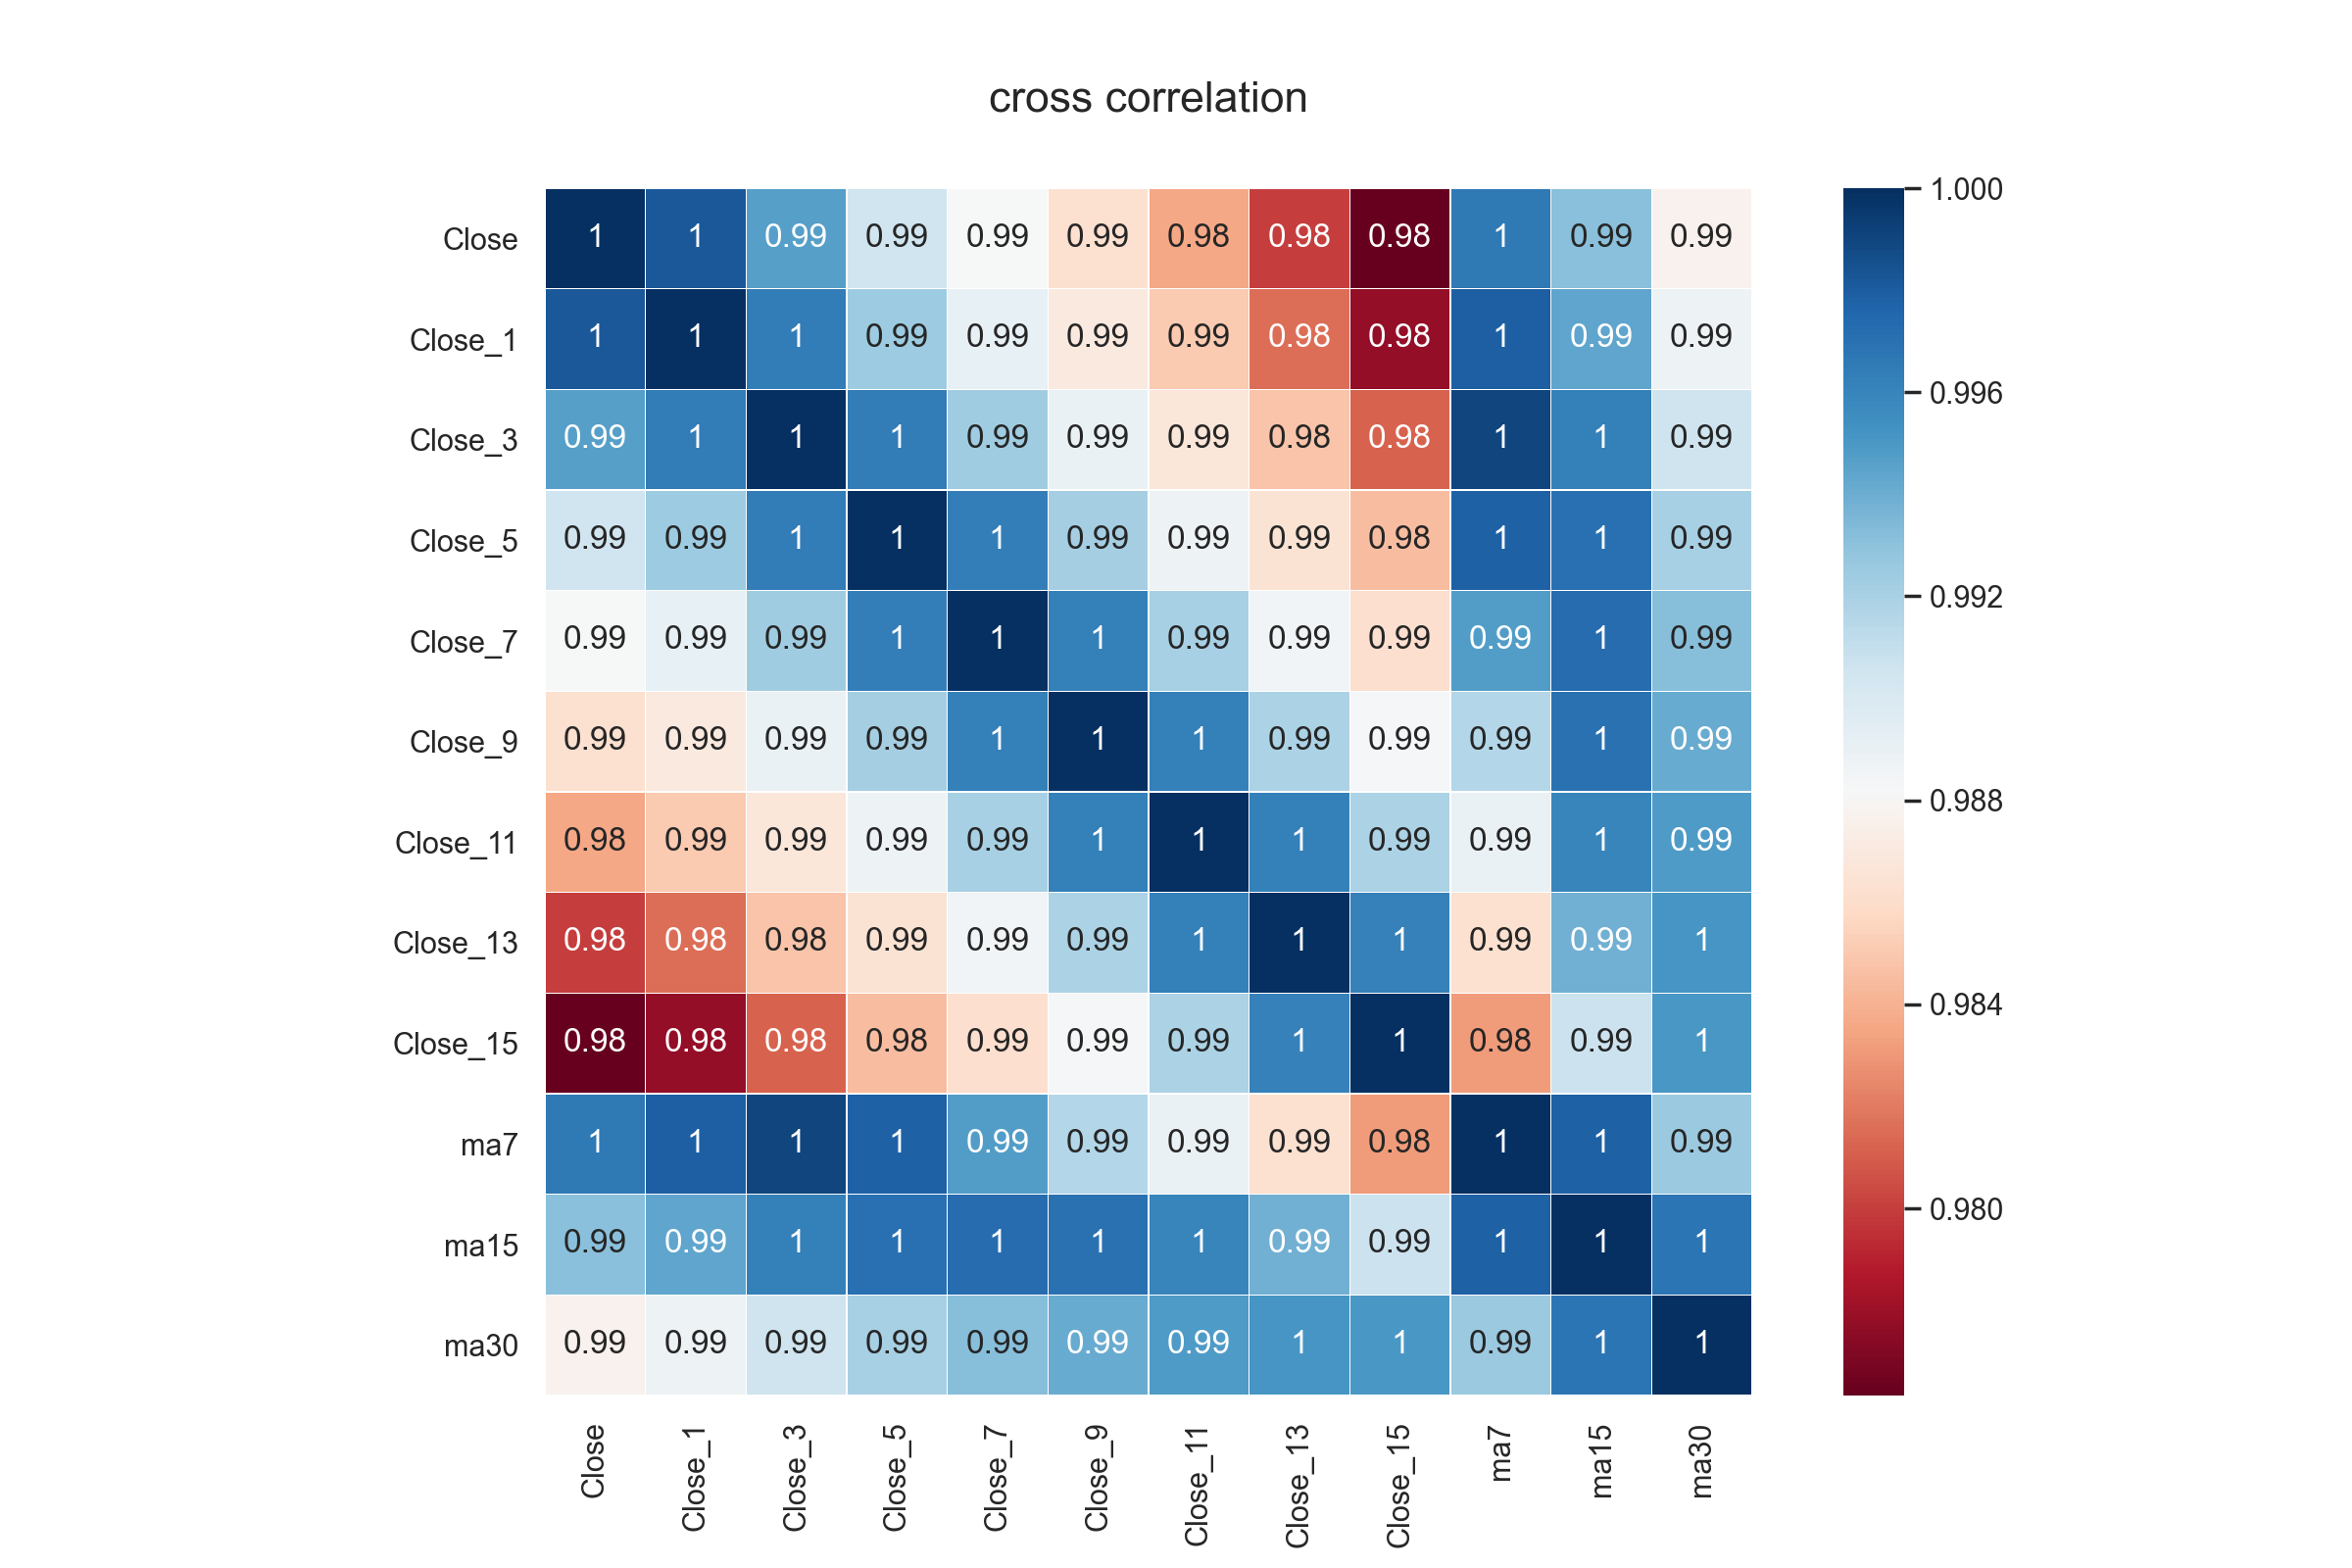

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 8))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['Close','Close_1','Close_3','Close_5','Close_7','Close_9', 'Close_11', 'Close_13', 'Close_15' ,'ma7','ma15','ma30']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()
plt.savefig('correlation.png')

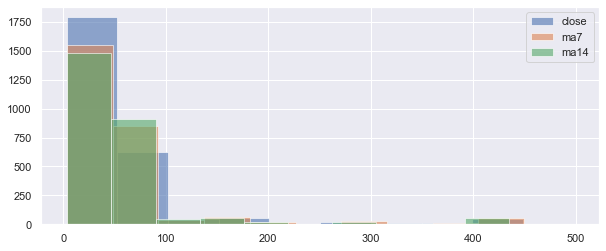

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated['Close'].hist(alpha=0.6,label='close',ax=ax)
df_crosscorrelated['ma7'].hist(alpha=0.6,label='ma7',ax=ax)
df_crosscorrelated['ma14'].hist(alpha=0.6,label='ma14',ax=ax)
plt.legend()
plt.show()

In [38]:
df_crosscorrelated

Date       Close     Close_1     Close_3     Close_5     Close_7  \
0    2010-06-30    4.766000         NaN         NaN         NaN         NaN   
1    2010-07-01    4.392000    4.766000         NaN         NaN         NaN   
2    2010-07-02    3.840000    4.392000         NaN         NaN         NaN   
3    2010-07-06    3.222000    3.840000    4.766000         NaN         NaN   
4    2010-07-07    3.160000    3.222000    4.392000         NaN         NaN   
...         ...         ...         ...         ...         ...         ...   
2609 2020-11-09  421.260010  429.950012  420.980011  400.510010  410.829987   
2610 2020-11-10  410.359985  421.260010  438.089996  423.899994  388.040009   
2611 2020-11-11  417.130005  410.359985  429.950012  420.980011  400.510010   
2612 2020-11-12  411.760010  417.130005  421.260010  438.089996  423.899994   
2613 2020-11-13  408.500000  411.760010  410.359985  429.950012  420.980011   

         Close_9    Close_11    Close_13    Close_15         ma7        ma15  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
2609  424.679993  420.630005  422.640015  430.829987  417.532863  418.369336   
2610  406.019989  420.279999  425.790009  421.940002  420.721431  417.597335   
2611  410.829987  424.679993  420.630005  422.640015  423.095716  417.230001   
2612  388.040009  406.019989  420.279999  425.790009  421.361433  416.294668   
2613  400.510010  410.829987  424.679993  420.630005  419.578574  415.486001   

            ma30     loess_5    loess_15  
0            NaN    3.670400    4.156778  
1            NaN    3.679282    4.163059  
2            NaN    3.688234    4.169330  
3            NaN    3.697258    4.175589  
4            NaN    3.706354    4.181836  
...          ...         ...         ...  
2609  426.046001  477.673797  389.100007  
2610  425.755667  480.180386  390.296946  
2611  425.359667  482.687174  391.494303  
2612  424.146334  485.194157  392.692079  
2613  423.926667  487.701328  393.890269  

[2614 rows x 15 columns]

<IPython.core.display.Javascript object>


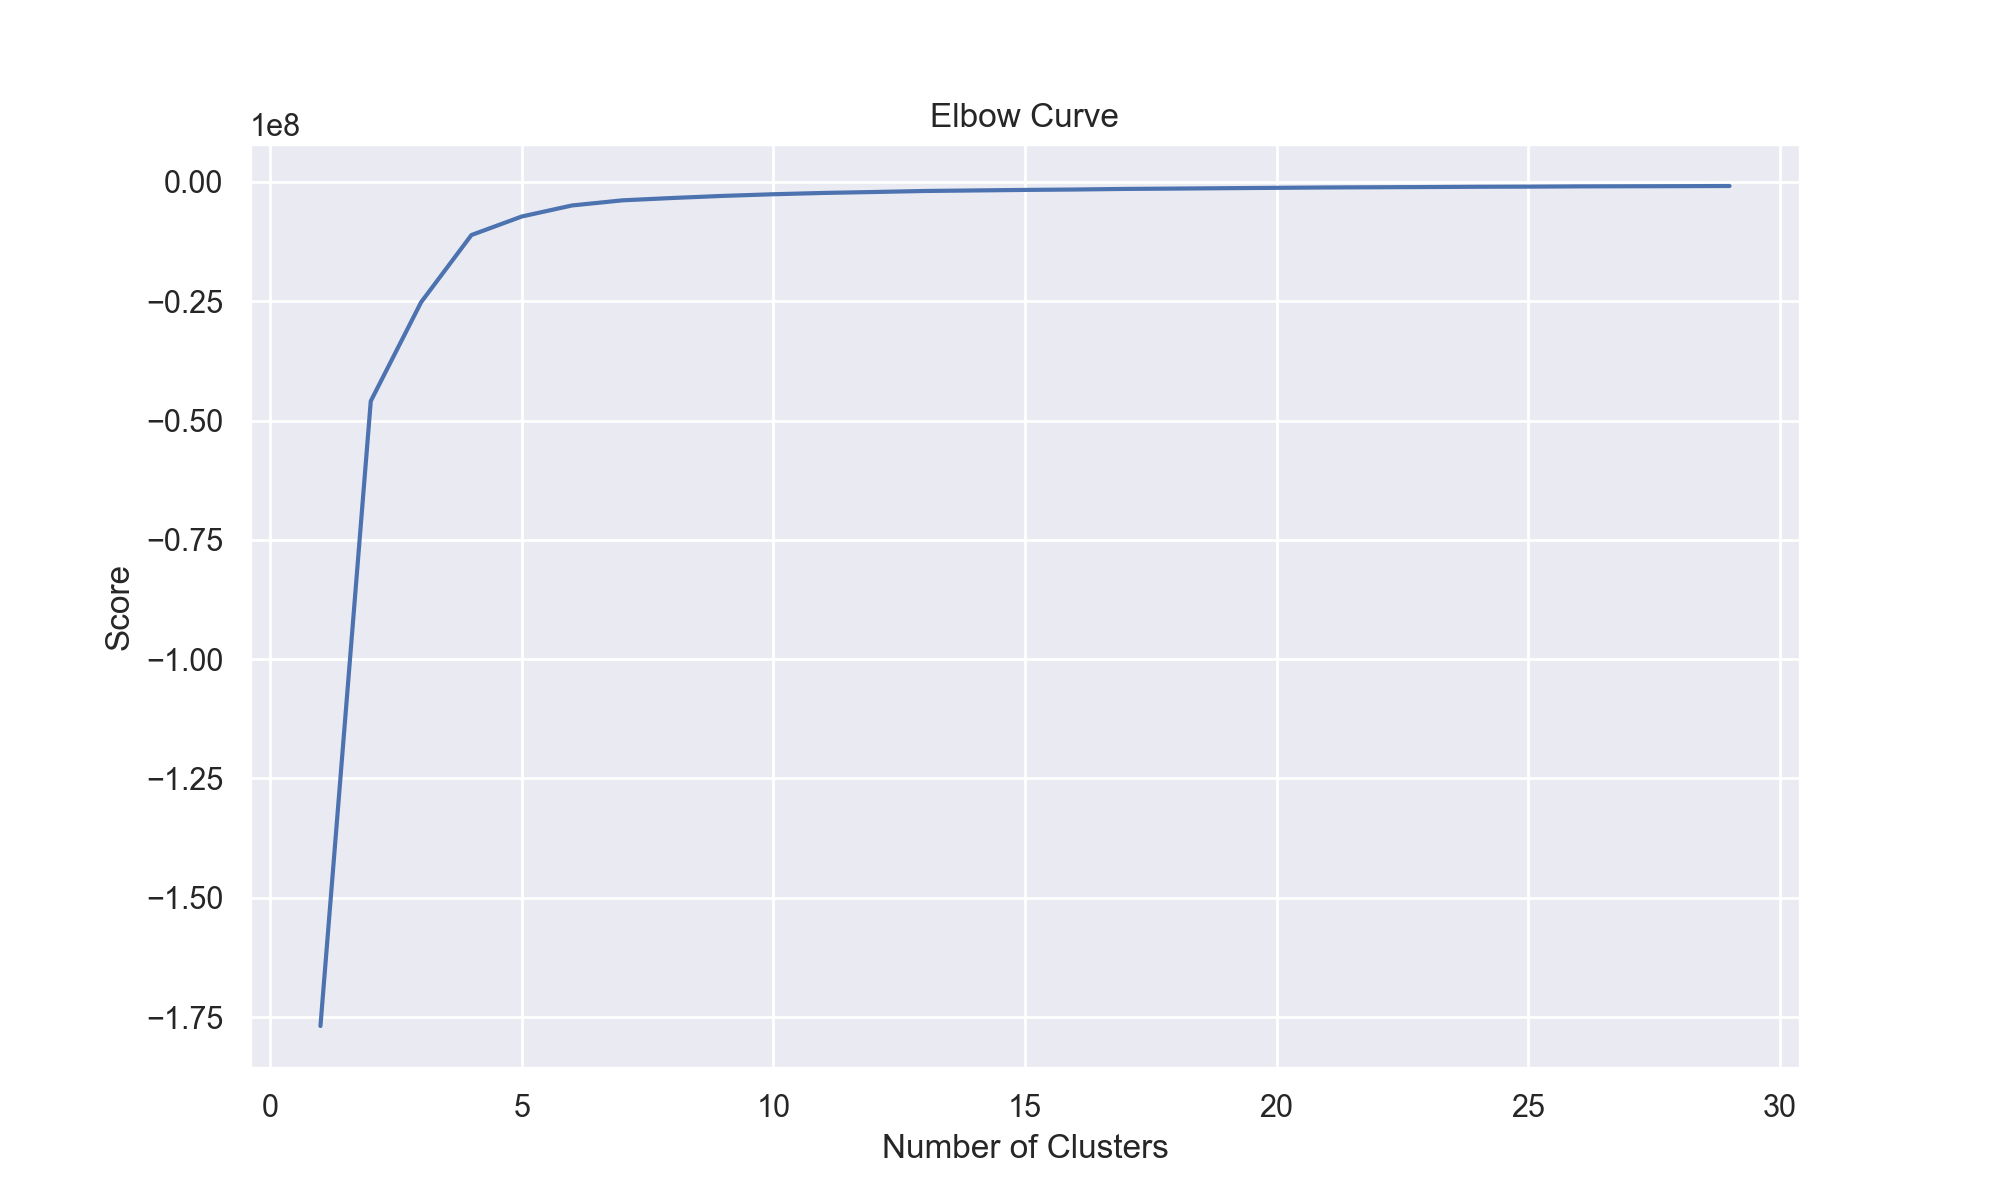

In [43]:
from sklearn.cluster import KMeans

n_cluster = range(1, 30)
data = df_crosscorrelated.iloc[:,1:].dropna().values
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
plt.savefig(fname="x6.png")

<IPython.core.display.Javascript object>


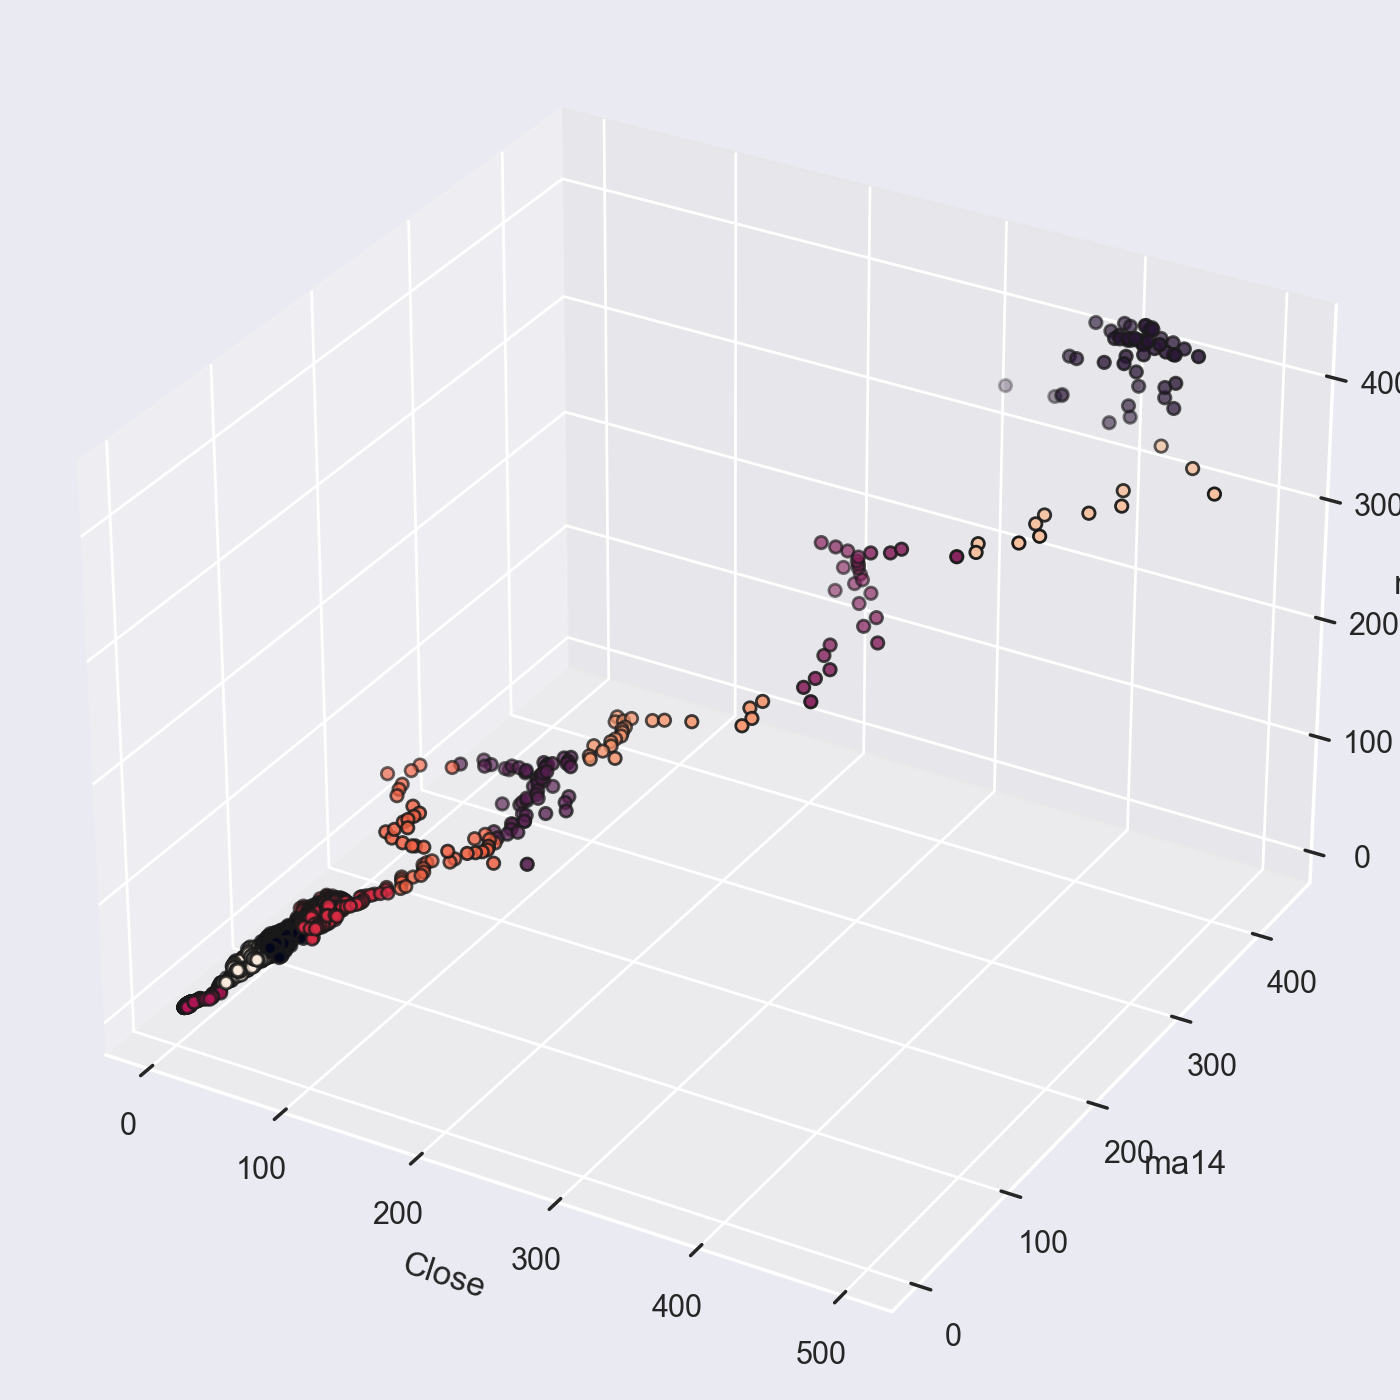

In [45]:
from mpl_toolkits.mplot3d import Axes3D

X = df_crosscorrelated[['Close','ma15','ma30']].dropna()
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("Close")
ax.set_ylabel("ma14")
ax.set_zlabel("ma25")
plt.title("K Means", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


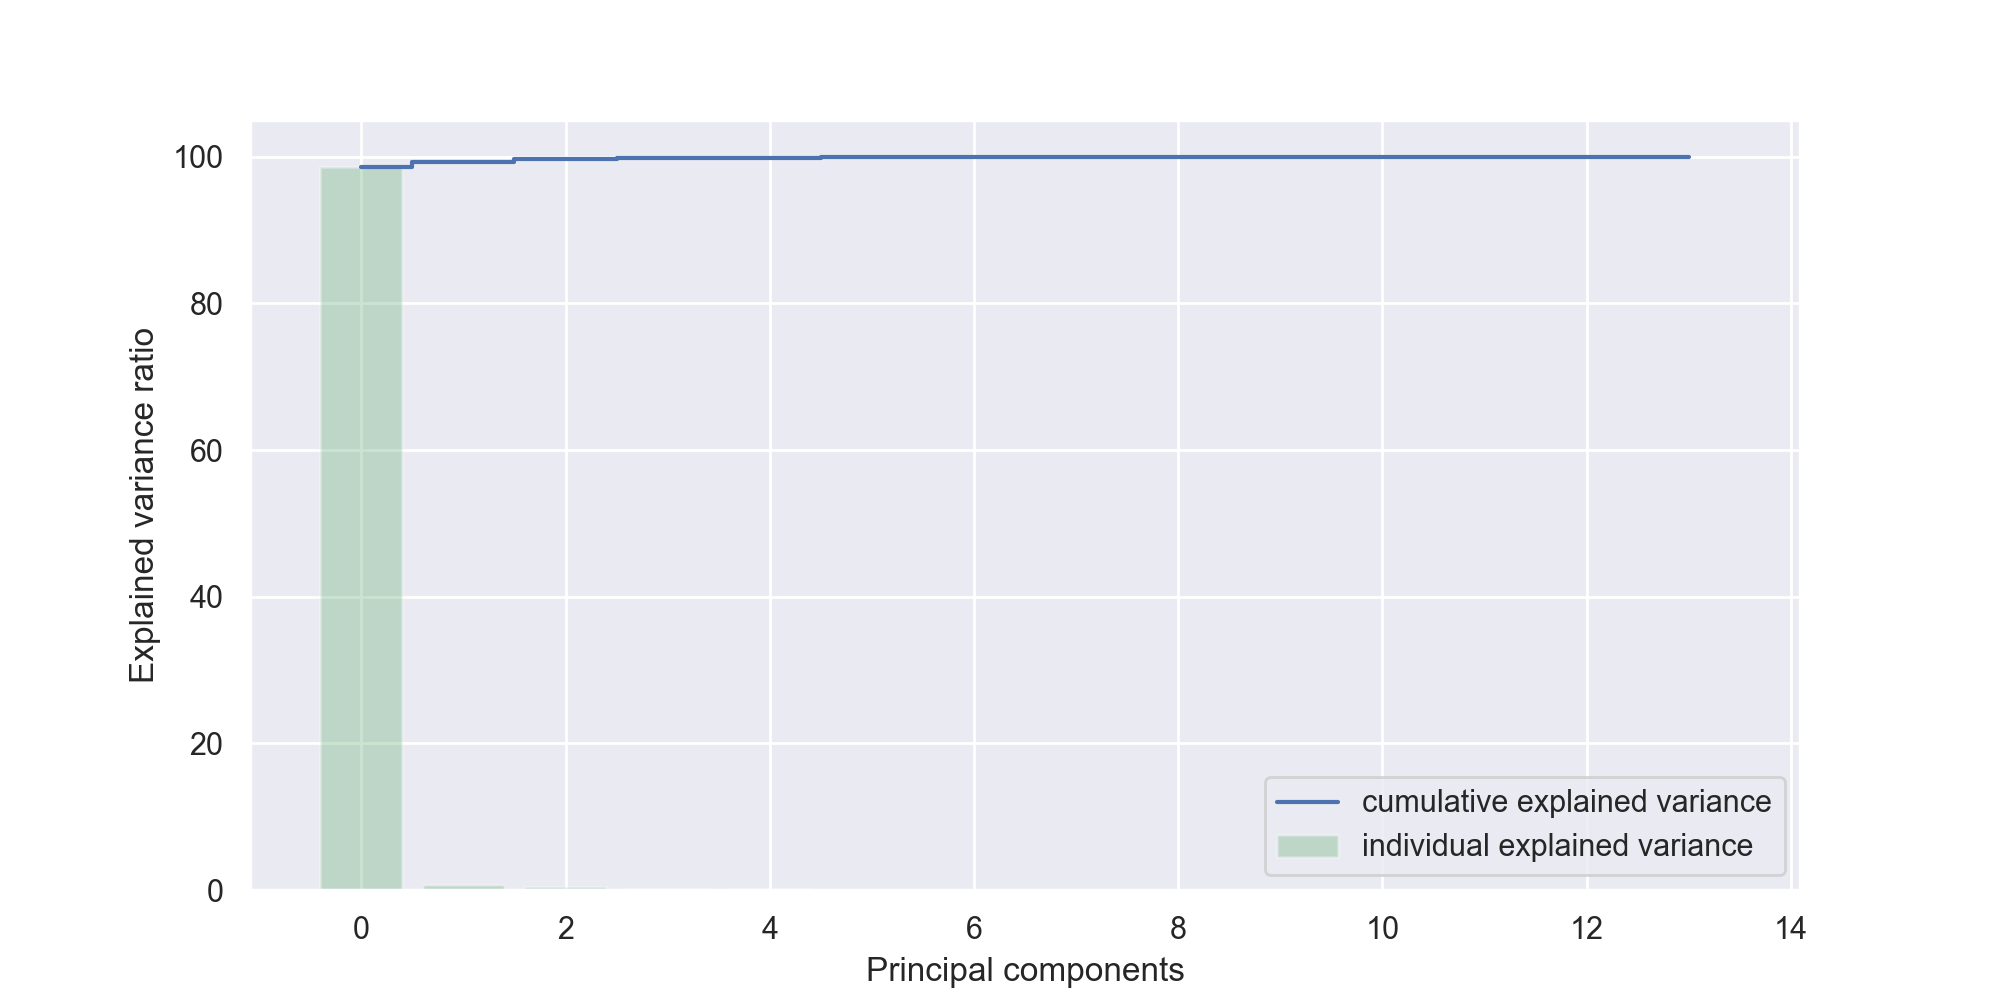

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [47]:
X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

In [48]:
df = df_crosscorrelated.dropna()
kmeans = KMeans(n_clusters=10).fit(np_scaled)
df['cluster'] = kmeans.predict(np_scaled)
df = df.reset_index()
df['principal_feature1'] = np_scaled[:,0]
df['principal_feature2'] = np_scaled[:,1]
df['cluster'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4    820
0    768
6    677
5     89
2     56
3     53
7     43
1     31
8     26
9     22
Name: cluster, dtype: int64

In [49]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i]
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.1
distance = getDistanceByPoint(np_scaled, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1'] = (distance >= threshold).astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


<IPython.core.display.Javascript object>


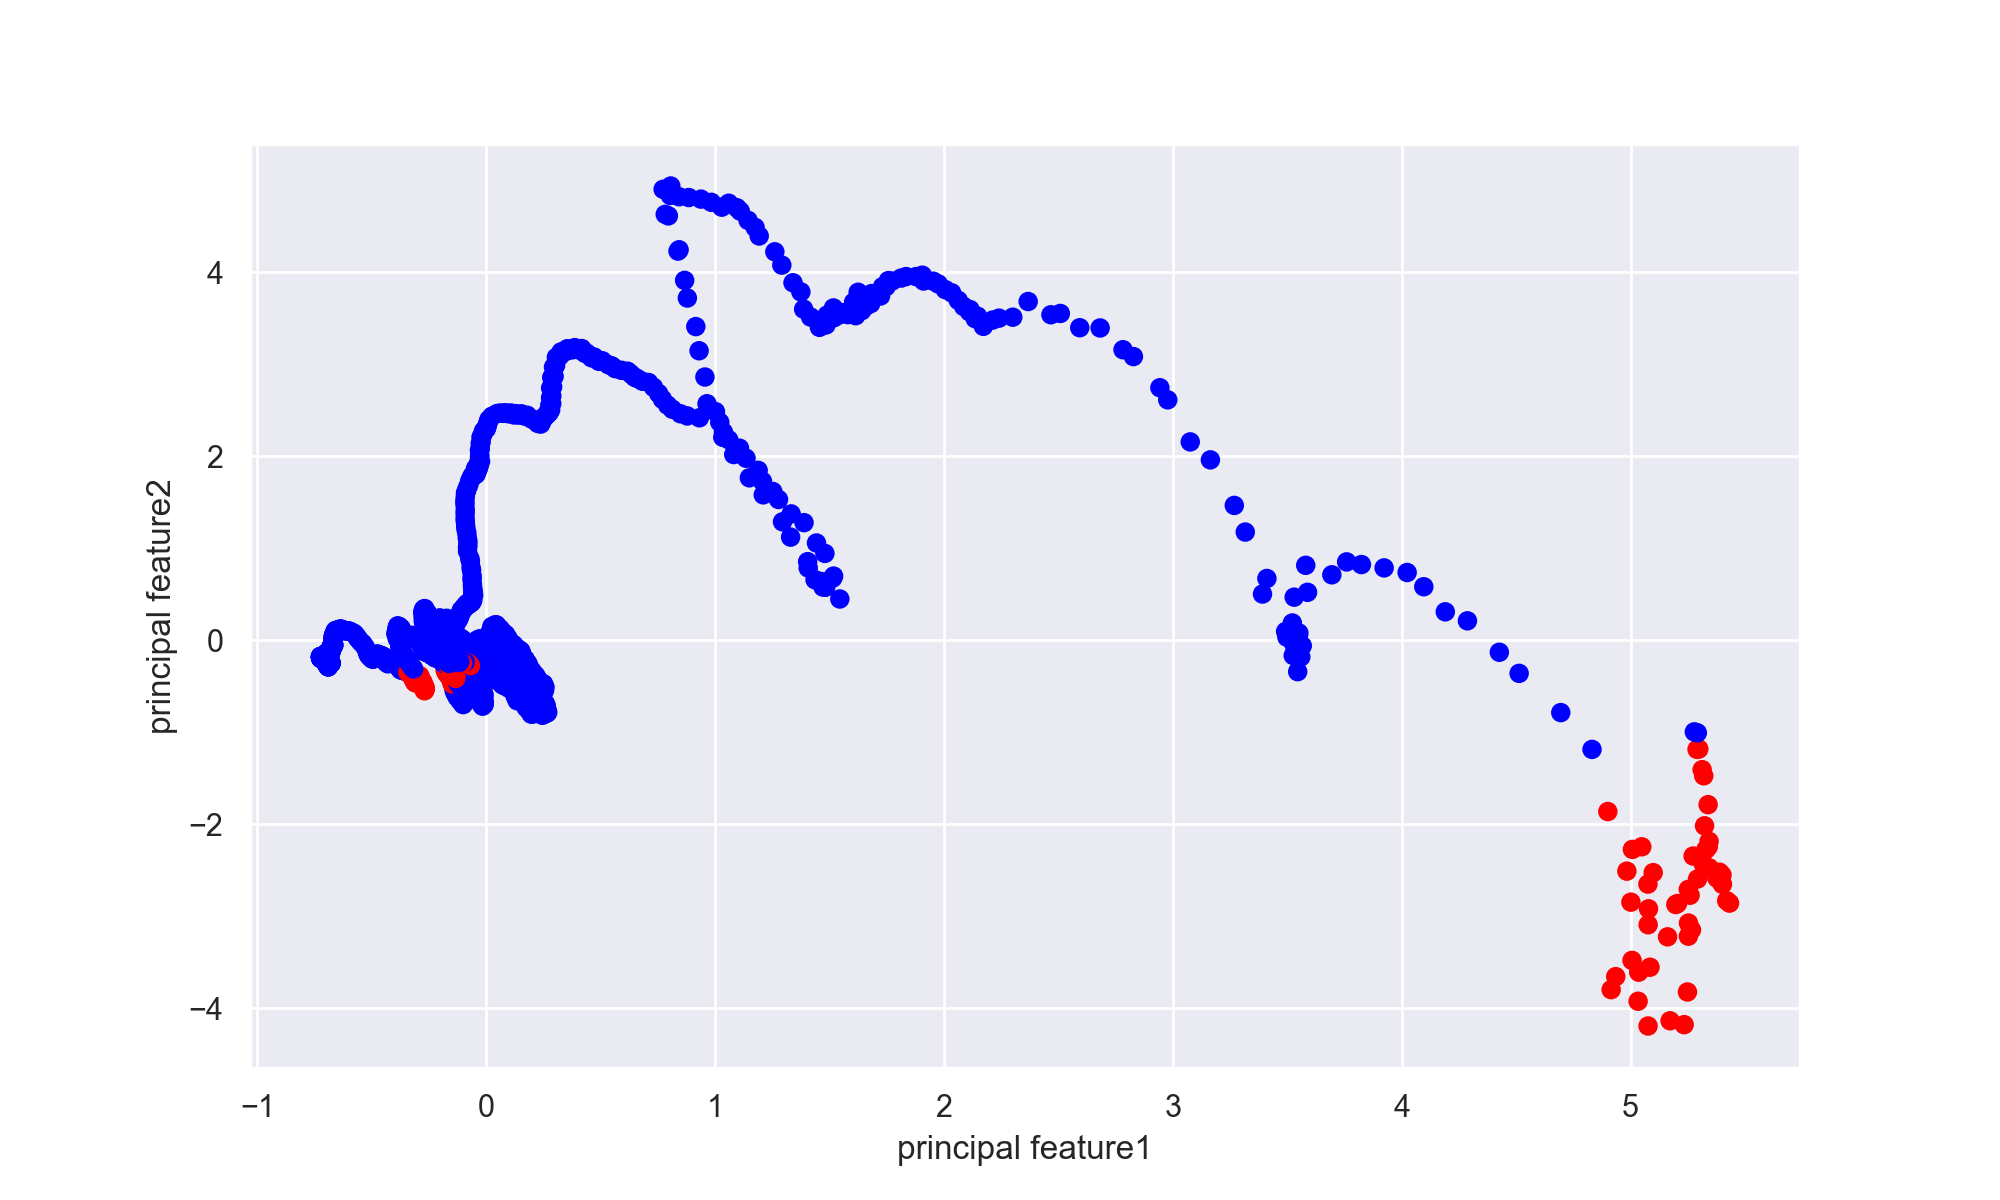

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show()

In [51]:
df.anomaly1.value_counts()

0    2327
1     258
Name: anomaly1, dtype: int64

<IPython.core.display.Javascript object>


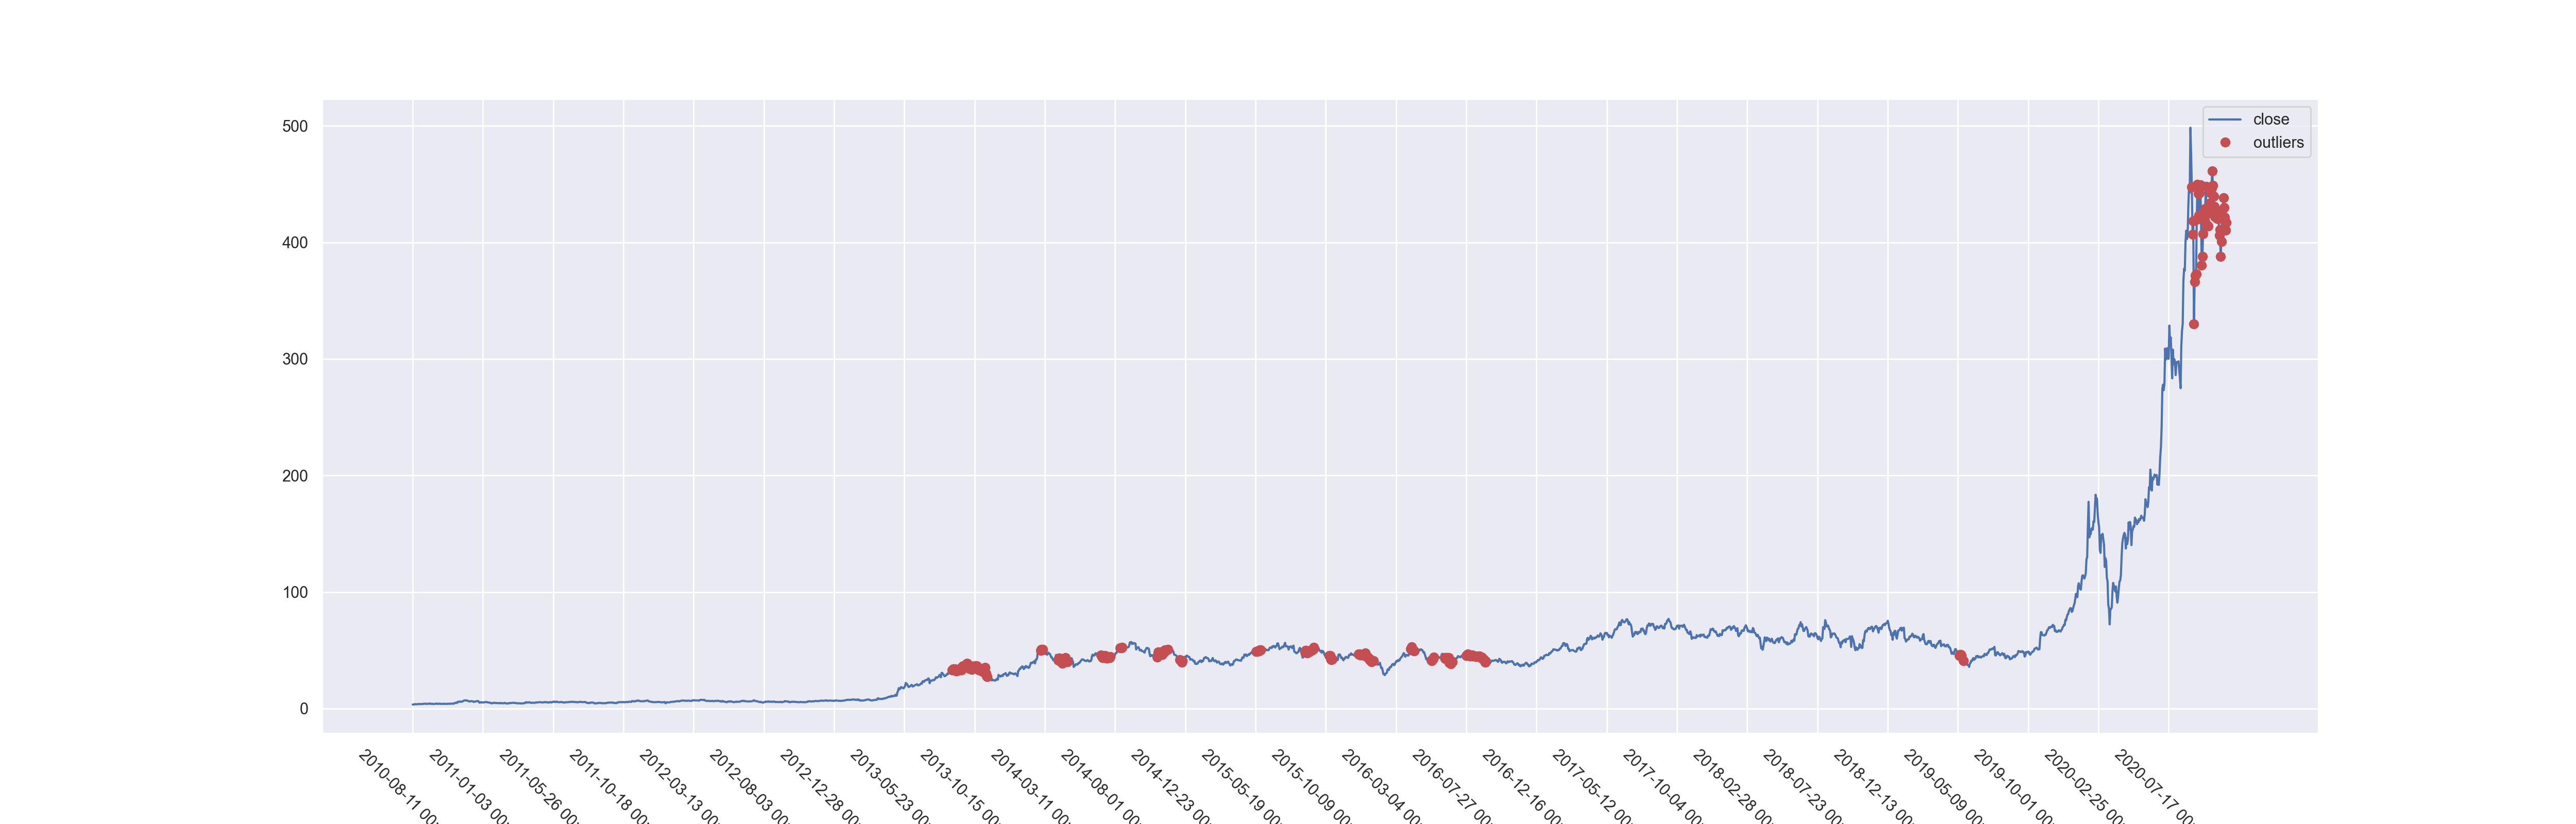

In [55]:
plt.figure(figsize=(25, 8))
plt.plot(df['Close'], label='close',c='b')
plt.plot(df['Close'], 'o', label='outliers',markevery=df.loc[df['anomaly1'] == 1].index.tolist(),c='r')
plt.xticks(np.arange(df.shape[0])[::100],df['Date'][::100],rotation='-45')
plt.legend()
plt.show()
plt.savefig(fname="dis1.png")

<IPython.core.display.Javascript object>


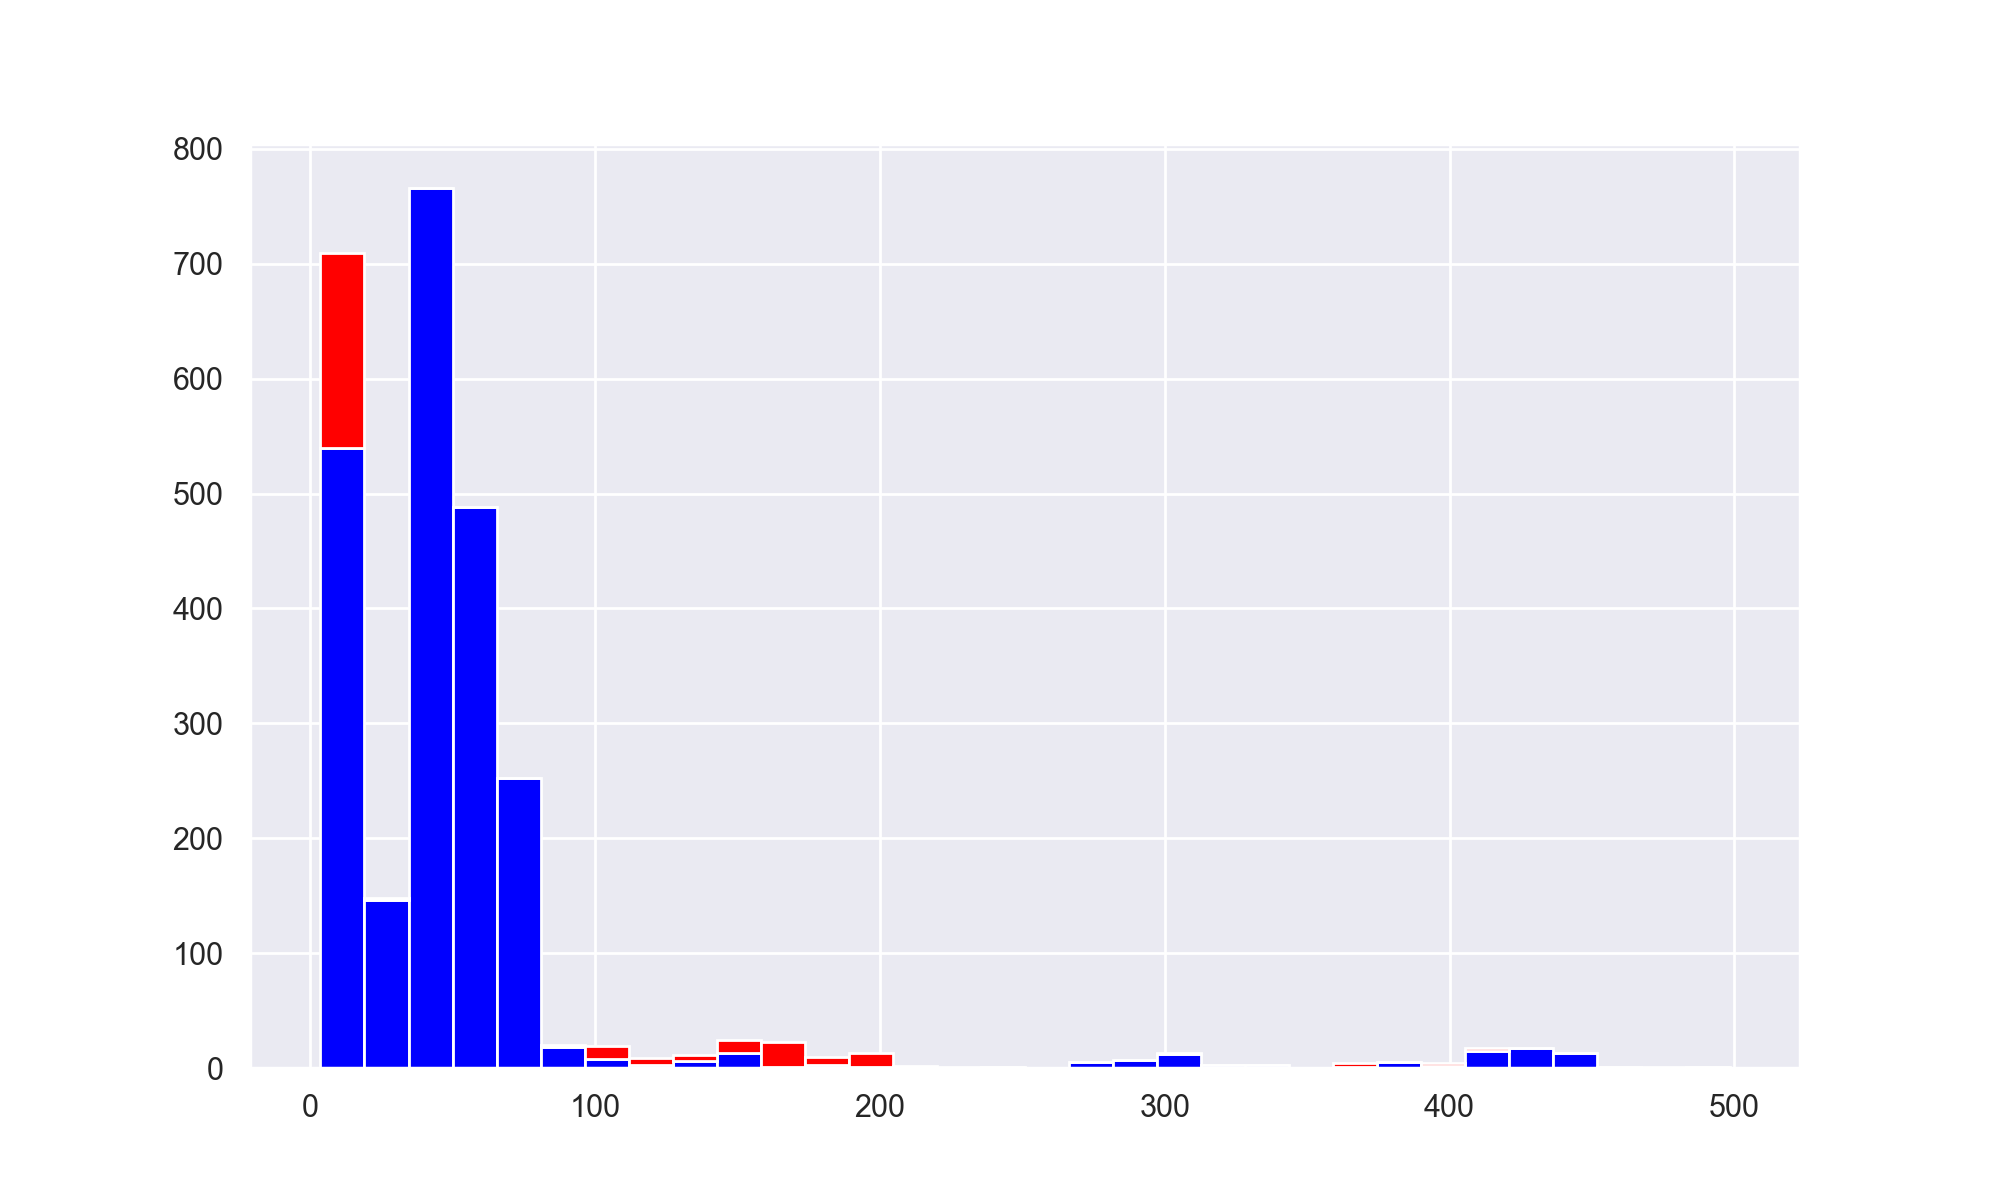

In [23]:
a = df.loc[df['anomaly1'] == 0, 'Close']
b = df.loc[df['anomaly1'] == 1, 'Close']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


<IPython.core.display.Javascript object>


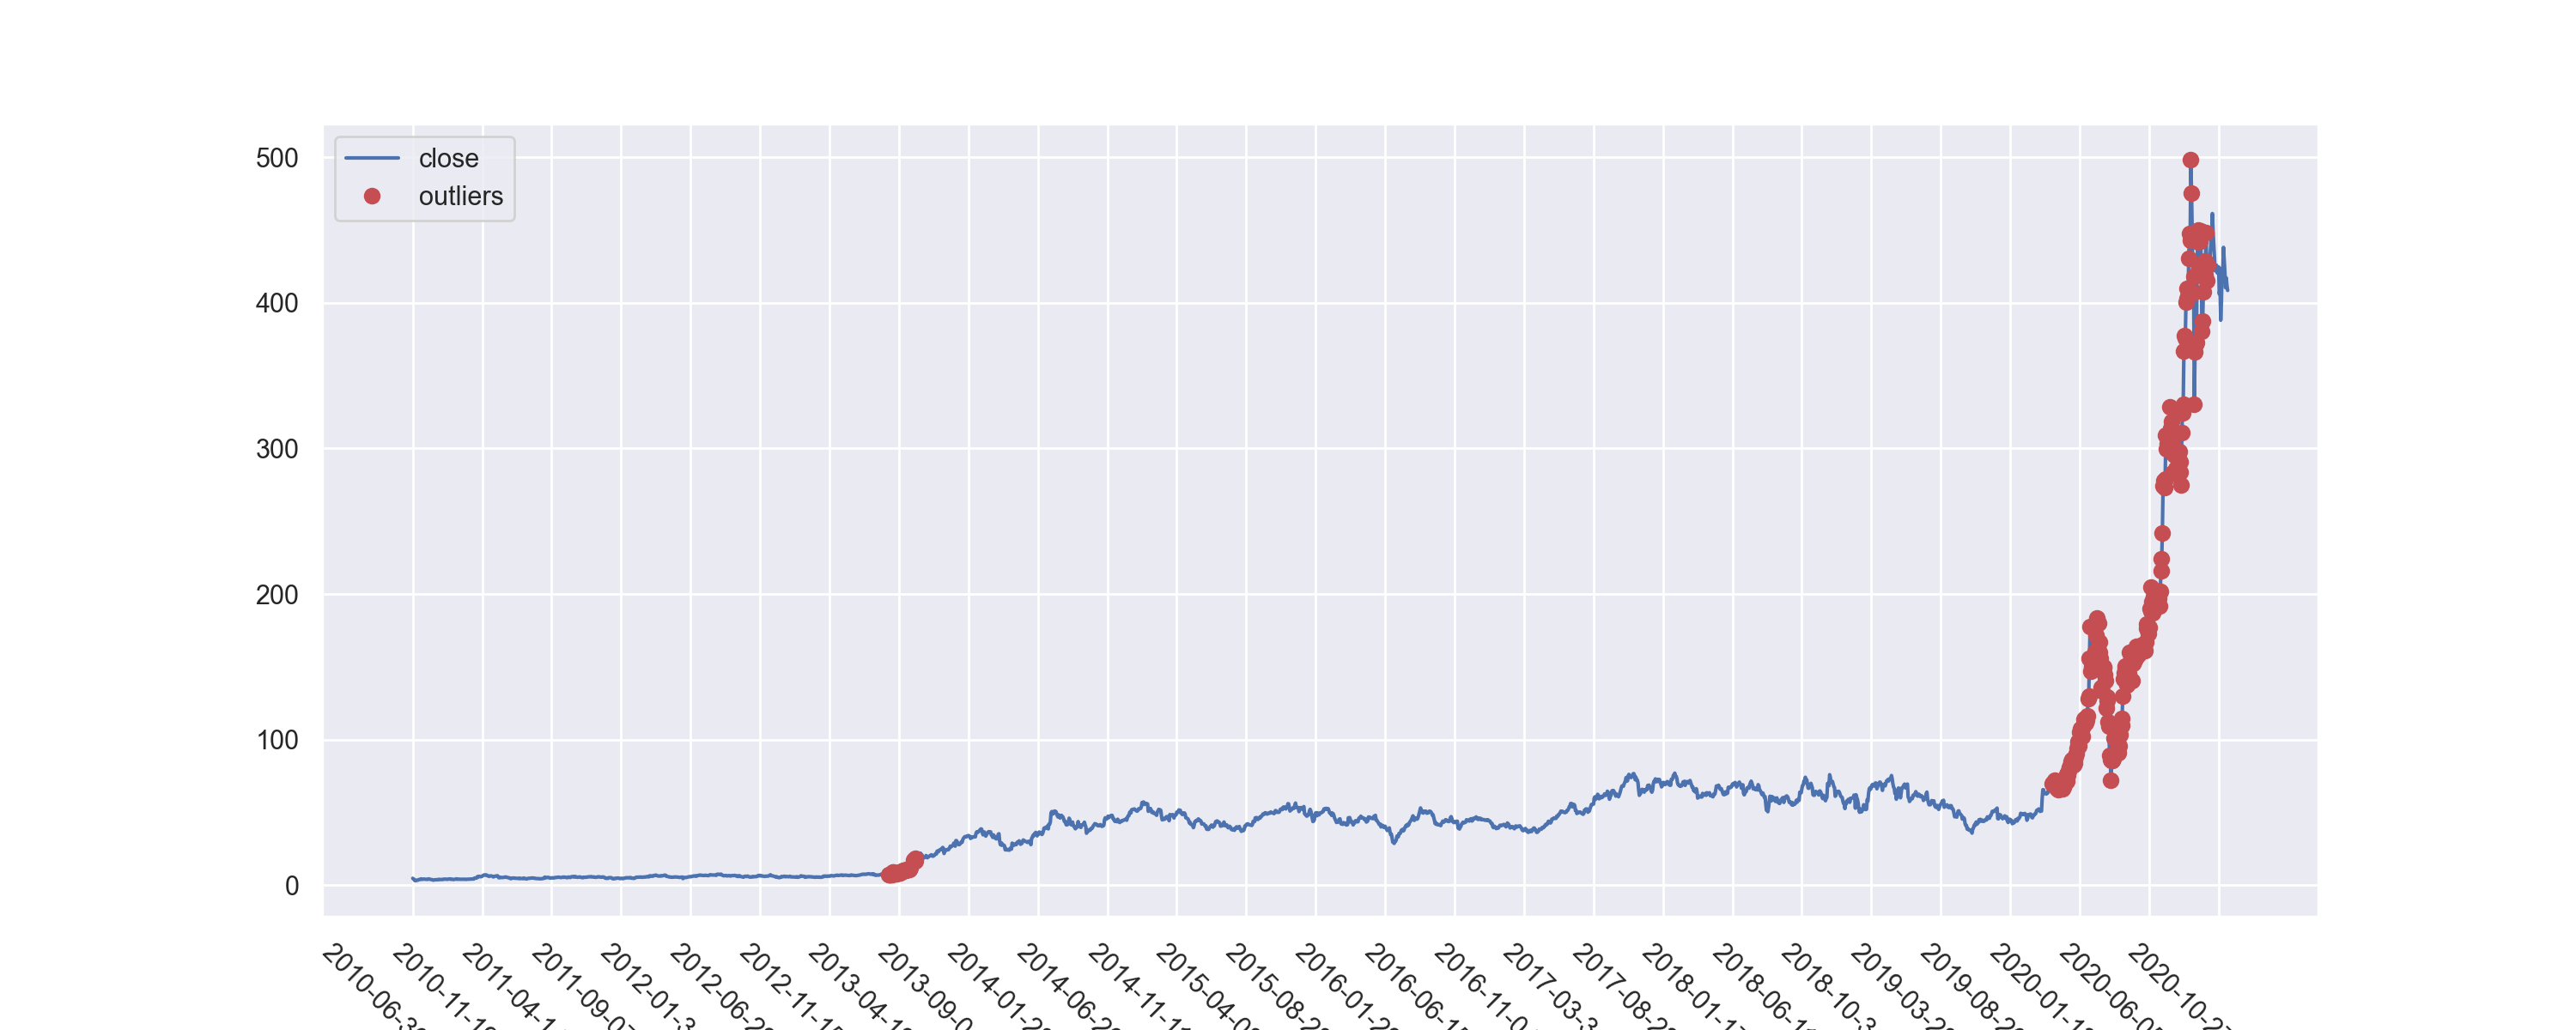

In [56]:
from sklearn.ensemble import IsolationForest

X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)

model = IsolationForest(contamination=outliers_fraction)
model.fit(np_scaled)
outliers = model.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['Close'], label='close',c='b')
plt.plot(df_crosscorrelated['Close'], 'o', label='outliers',markevery=np.where(outliers==-1)[0].tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::100],df_crosscorrelated['Date'][::100],rotation='-45')
plt.legend()
plt.savefig(fname="dis2.png")
plt.show()

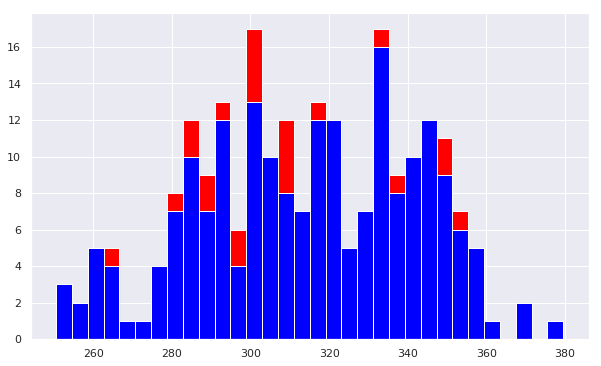

In [62]:
close = df_crosscorrelated['Close'].values
a = close[np.where(outliers==1)[0]]
b = close[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

<IPython.core.display.Javascript object>


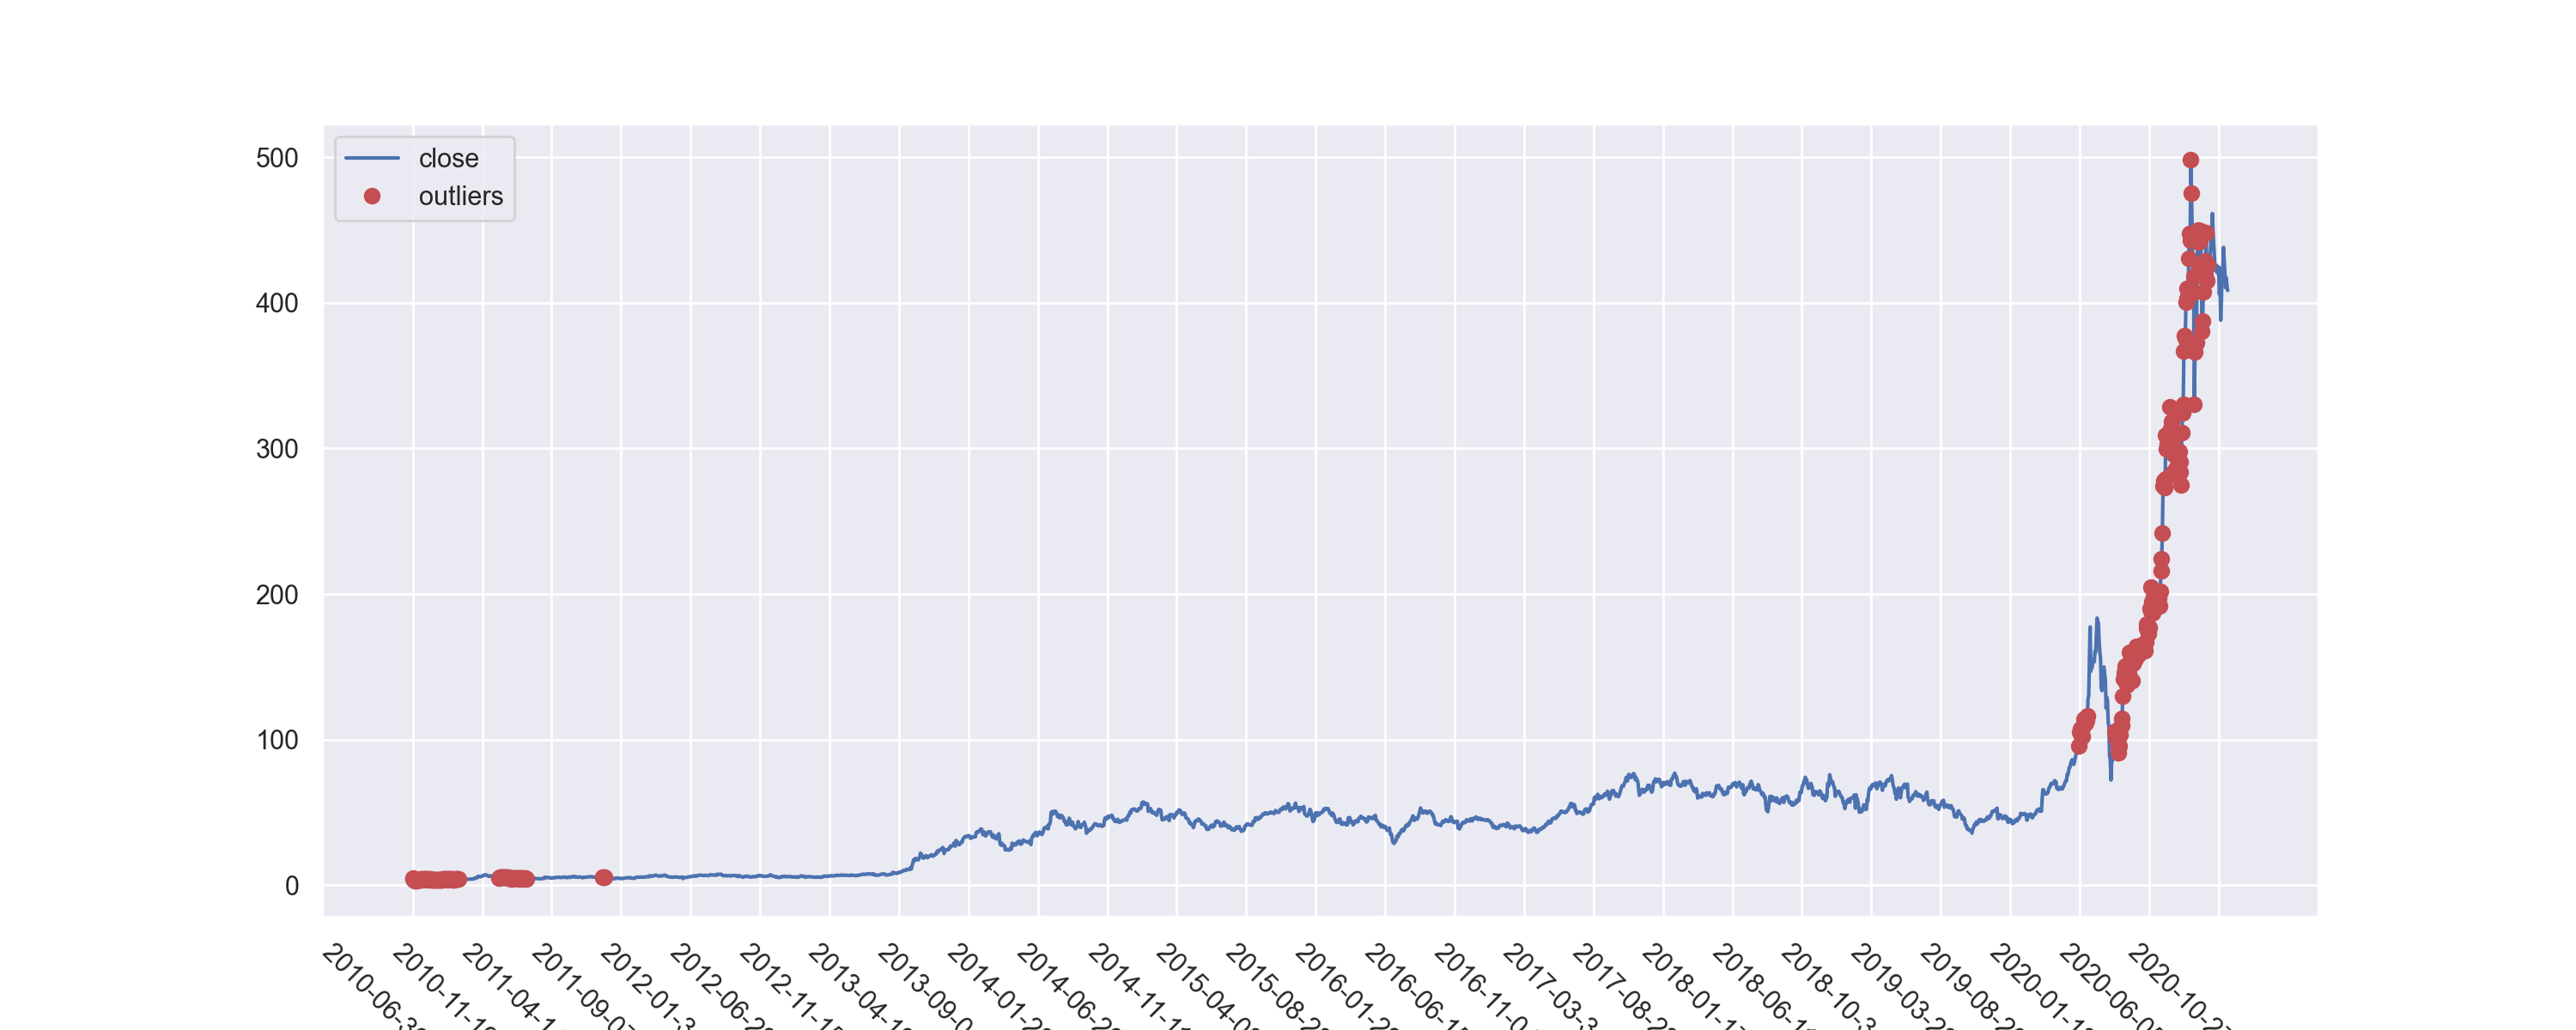

In [58]:
from sklearn.svm import OneClassSVM

X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(np_scaled)
outliers = model.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['Close'], label='close',c='b')
plt.plot(df_crosscorrelated['Close'], 'o', label='outliers',markevery=np.where(outliers==-1)[0].tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::100],df_crosscorrelated['Date'][::100],rotation='-45')
plt.legend()
plt.show()
plt.savefig(fname="dis3.png")

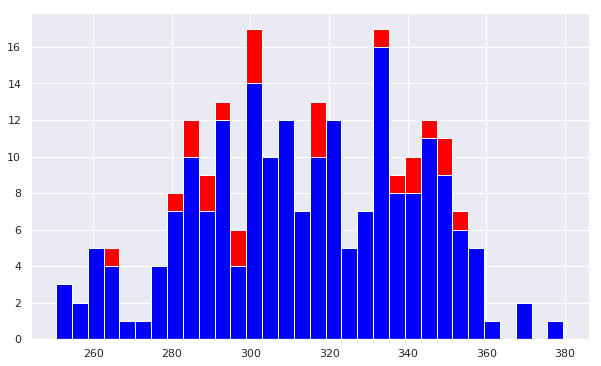

In [66]:
close = df_crosscorrelated['Close'].values
a = close[np.where(outliers==1)[0]]
b = close[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

<IPython.core.display.Javascript object>


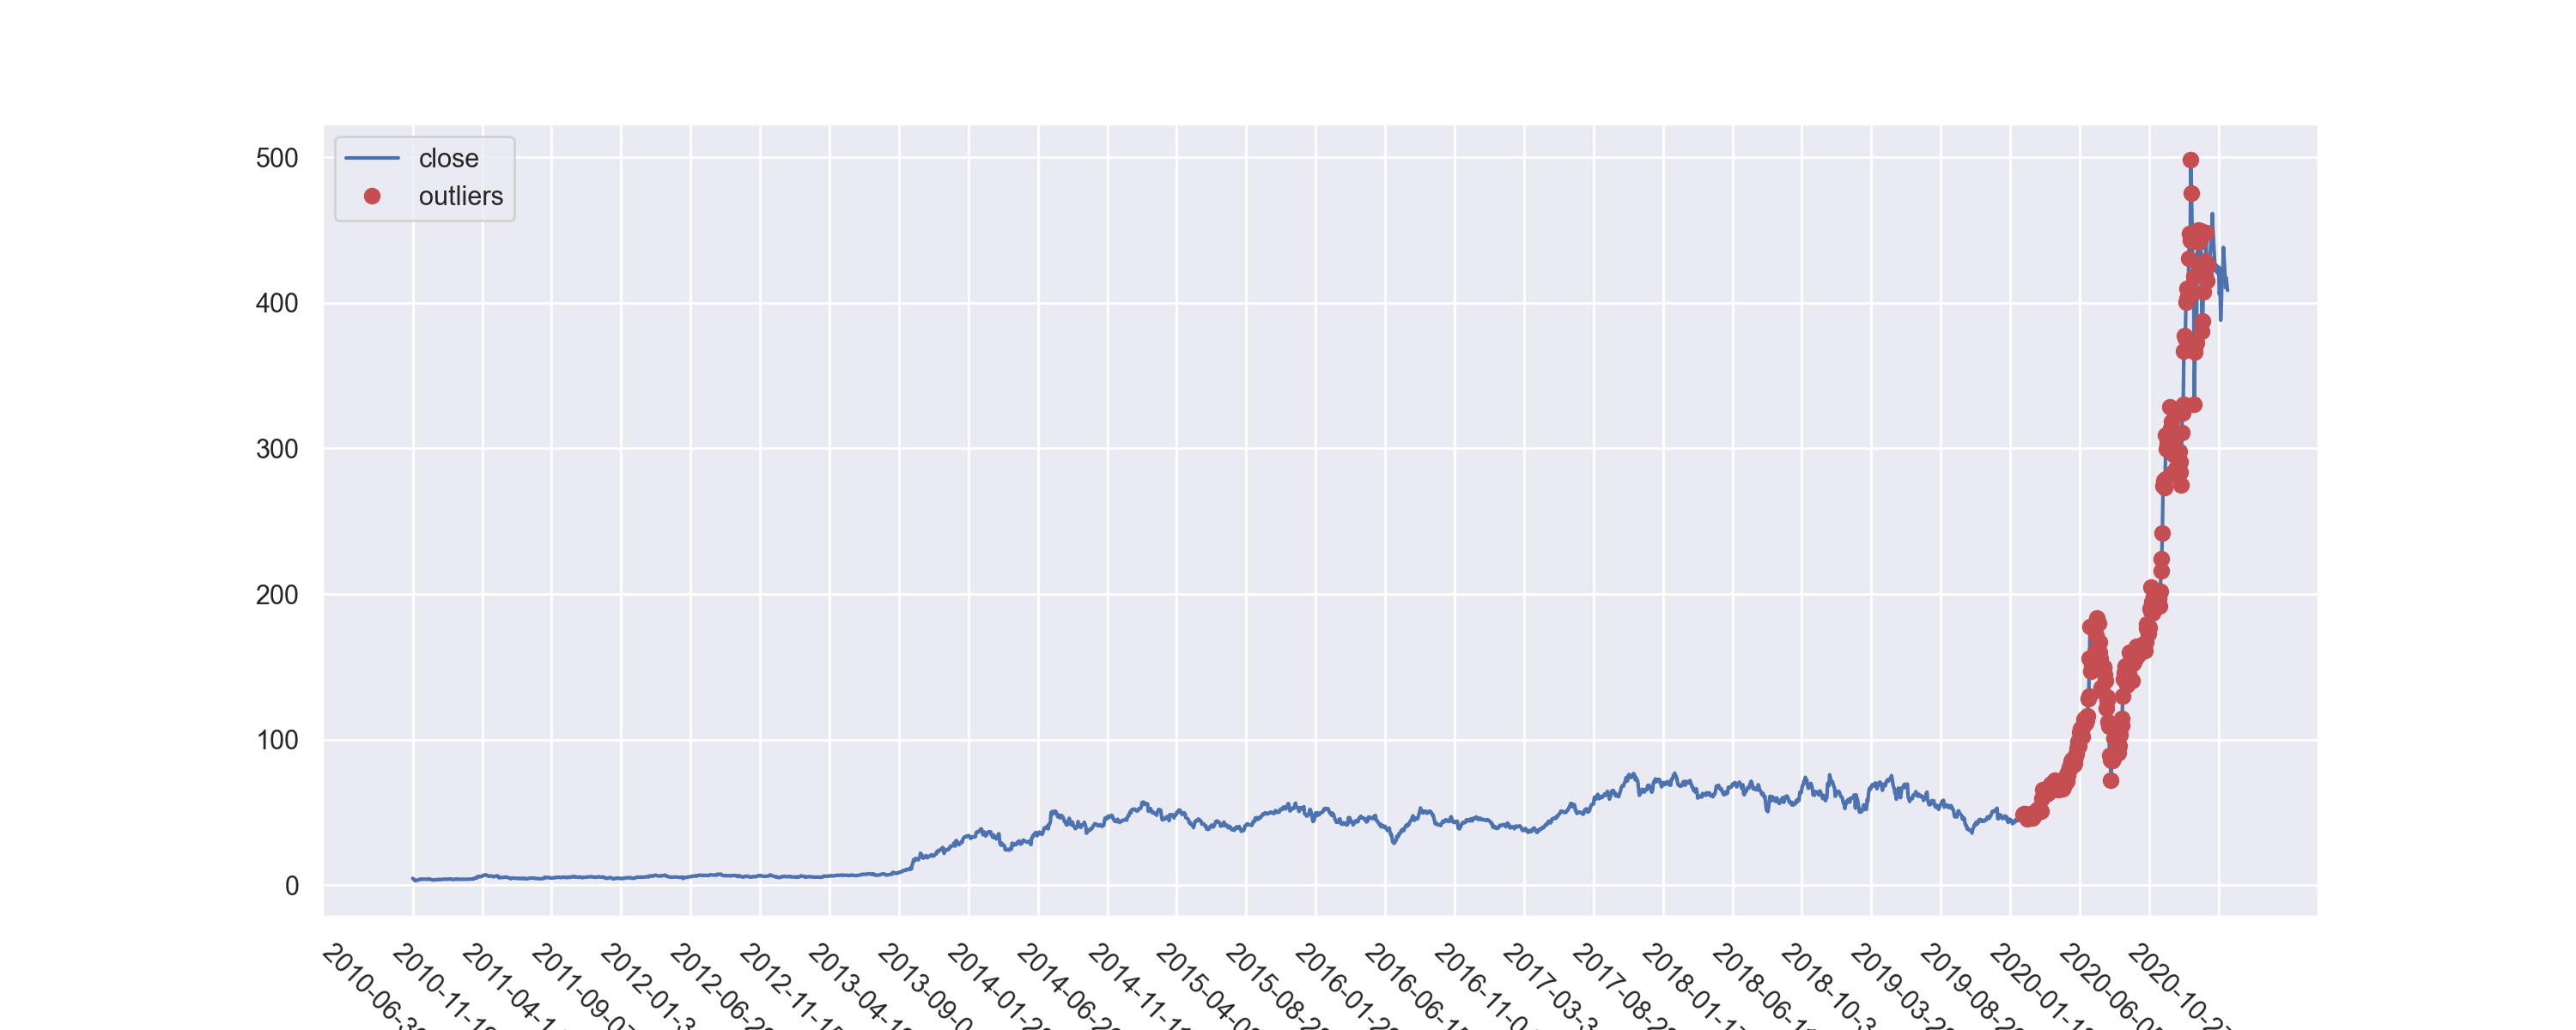

In [59]:
from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination = outliers_fraction)
X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)
envelope.fit(np_scaled)
outliers = envelope.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['Close'], label='close',c='b')
plt.plot(df_crosscorrelated['Close'], 'o', label='outliers',markevery=np.where(outliers==-1)[0].tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::100],df_crosscorrelated['Date'][::100],rotation='-45')
plt.legend()
plt.show()
plt.savefig(fname="dis4.png")

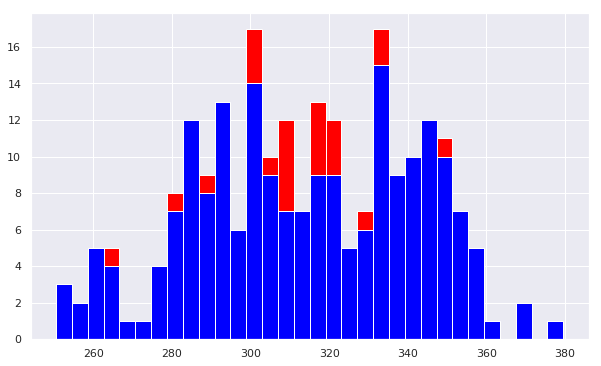

In [71]:
close = df_crosscorrelated['Close'].values
a = close[np.where(outliers==1)[0]]
b = close[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

In [4]:

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import statsmodels.api as sm

import seaborn as sns


In [11]:
from time_series import TimeSeries

# Imports for data visualization
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ts = TimeSeries(tesla, train_size=0.7)

plt.plot(ts.data.iloc[:,1].index,ts.data.iloc[:,1])
plt.gcf().autofmt_xdate()
plt.title("Average Temperature of India (2000-2018)")
plt.xlabel("Time")
plt.ylabel("Temparature (°C)")
plt.show()

ModuleNotFoundError: No module named 'time_series'

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(ts.data.iloc[:,1],model='additive',period=12).plot()
plt.show()

In [10]:
tesla = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], usecols=['Date', 'Close'])
tesla.head()

Date  Close
0 2010-06-30  4.766
1 2010-07-01  4.392
2 2010-07-02  3.840
3 2010-07-06  3.222
4 2010-07-07  3.160

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(ts.data.iloc[:,1],model='additive',period=12).plot()
plt.show()